In [1]:
#import the warnings
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the liberaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

In [3]:
#read application csv dataset
app_data = pd.read_csv(r"D:\1Stop.ai Projects\project 2 credit EDA\application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
#Data Inspection on Application csv dataset
##Get info and shape on the dataset
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#Data Quality Check
##Check for percentage of null values in application csv dataset
pd.set_option("display.max_rows",200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [6]:
#Conclusion: Columns with null values more than 47% may give wrong insights, hence we will drop them 
##Dropping columns with missing values greater than 47%
percentage = 47
threshold = int(((100-percentage)/100)*app_data.shape[0] + 1)
app_df = app_data.dropna(axis=1, how='any')
app_df = app_data.dropna(axis=1, thresh=threshold)
app_df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [7]:
app_df.shape

(307511, 73)

In [8]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [9]:
#impute missing values
##check  for the missing values in application csv dataset before imputing
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [10]:
#occupation type column has 31% missing values , sinc its a categorical column , imputing the missingg values with a unknown or other values
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [11]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [12]:
app_df.OCCUPATION_TYPE.fillna("Others",inplace=True)

In [13]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [14]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

In [15]:
#EXT_SOURCE_3 Column has 19% missing values
app_df.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [16]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: proportion, Length: 814, dtype: float64

In [17]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

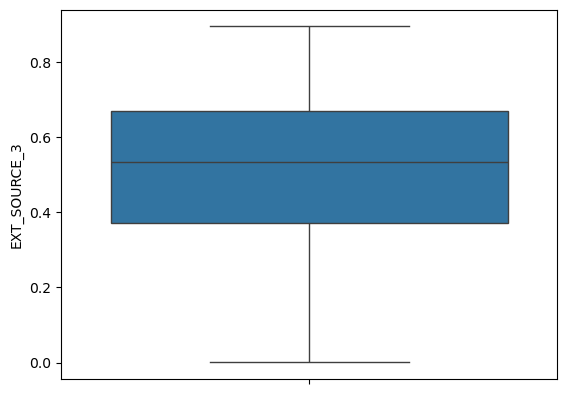

In [18]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

In [19]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [20]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [21]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: proportion, Length: 814, dtype: float64

In [22]:
# Conclusion : since its a  numerical column with no outliers and there is no much difference between mean and median , hence we can impute with mean or median
null_cols = list(app_df.isna().any())
len(null_cols)

73

In [23]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [24]:
#Handaling Missing values in column with 13% nill values
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [25]:
#Conclusion: we can se that 99% of the values in the columns AMT_REQ_CREDIT_BUREAU_HOUR , AMT_REQ_CREDIT_BUREAU_DAY , AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON , AMT_REQ_CREDIT_BUREAU_QRT , AMT_REQ_CREDIT_BUREAU_YEAR is 0.0 , Hence impute these columns with the mode
cols = ["AMT_REQ_CREDIT_BUREAU_HOUR" , "AMT_REQ_CREDIT_BUREAU_DAY" , "AMT_REQ_CREDIT_BUREAU_WEEK" , "AMT_REQ_CREDIT_BUREAU_MON" , "AMT_REQ_CREDIT_BUREAU_QRT" , "AMT_REQ_CREDIT_BUREAU_YEAR"]


In [26]:
for col in cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace = True)

In [27]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [28]:
#Handling missing values less than 1%
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [29]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [30]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*True

NAME_TYPE_SUITE
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: proportion, dtype: float64

In [31]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*True

EXT_SOURCE_2
0.285898    0.002350
0.262258    0.001359
0.265256    0.001118
0.159679    0.001049
0.265312    0.000997
              ...   
0.004725    0.000003
0.257313    0.000003
0.282030    0.000003
0.181540    0.000003
0.267834    0.000003
Name: proportion, Length: 119831, dtype: float64

In [32]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*True

OBS_30_CNT_SOCIAL_CIRCLE
0.0      0.534797
1.0      0.159167
2.0      0.097256
3.0      0.066306
4.0      0.046145
5.0      0.031169
6.0      0.021055
7.0      0.014323
8.0      0.009681
9.0      0.006535
10.0     0.004490
11.0     0.002780
12.0     0.002127
13.0     0.001341
14.0     0.000842
15.0     0.000542
16.0     0.000434
17.0     0.000287
18.0     0.000150
19.0     0.000144
20.0     0.000098
21.0     0.000095
22.0     0.000072
23.0     0.000049
25.0     0.000036
24.0     0.000036
27.0     0.000016
26.0     0.000010
30.0     0.000007
28.0     0.000003
29.0     0.000003
47.0     0.000003
348.0    0.000003
Name: proportion, dtype: float64

In [33]:
#Conclusion: 
##For categorical columns , impute the missing values with mode
##For numerical columns , impute the missing values with median

In [34]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0], inplace = True)

In [35]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0], inplace = True)

In [36]:
#Imputing numerical columns 
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [37]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [38]:
#Convert negetive values to positive in days variables so that median is not affected
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED = app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))

In [39]:
#Binning of continious variables 
##standardizing days columns in years for easy binning process 
app_df["YEARS_BIRTH"] = app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

In [40]:
#Binning AMT_CREDIT Column
app_df.AMT_CREDIT.value_counts(normalize=True)*100


AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [41]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [42]:
app_df["AMT_CREDIT_Category"] = pd.cut(app_df.AMT_CREDIT, [0, 200000 , 400000 , 600000 , 800000 , 1000000], 
                                       labels = ["Very low credit" , "Low credit" , "Medium credit" , "High credit" , "Very high credit"])

In [43]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

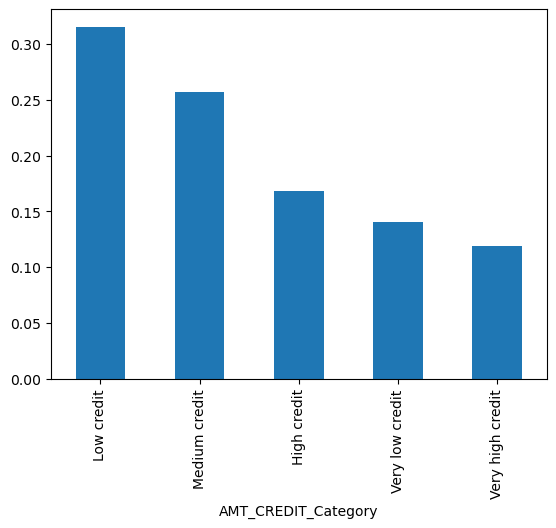

In [44]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

In [45]:
#Conclusion: the credit amount of the loanfor amount low(2L to 4L) or very high (above 8L)


In [46]:
#Binning years_birth column
app_df["AGE_Category"] = pd.cut(app_df.YEARS_BIRTH , [0, 25 , 45 , 65 , 85], 
                                       labels = ["Below 25" , "25-45" , "45-65" , "65-85"])

In [47]:
app_df.AGE_Category.value_counts(normalize=True)*100


AGE_Category
25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: proportion, dtype: float64

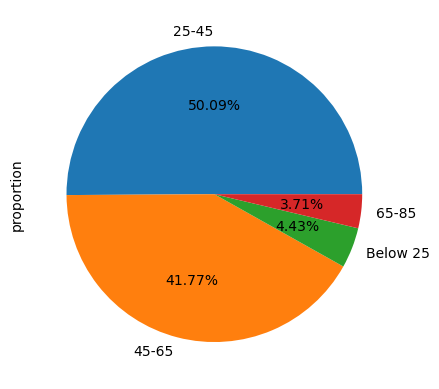

In [48]:
app_df["AGE_Category"].value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.show()

In [49]:
#Conclusion: most of the applicants are between 25-45 age group 

In [50]:
#Data imbalance chesk
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [51]:
#Dividing application csv dataset with target variables as 0 & 1
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [52]:
app_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [53]:
#Conclusion 1 out of 9/10 applicants are defaults 

In [54]:
#Univariate Analysis
cat_cols = list(app_df.columns[app_df.dtypes == object])
num_cols = list(app_df.columns[app_df.dtypes == np.int64]) + list(app_df.columns[app_df.dtypes == np.float64])


In [55]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [56]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


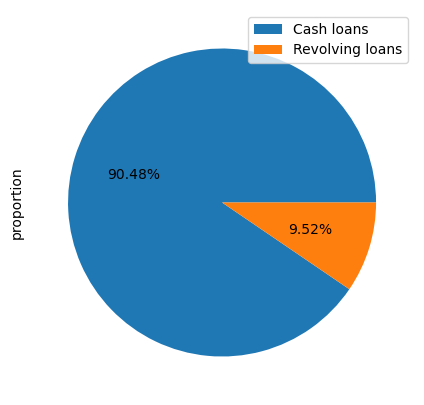

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


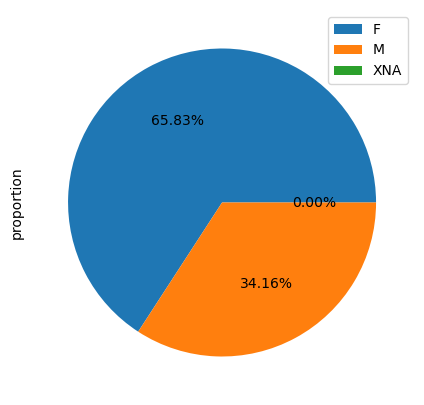

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


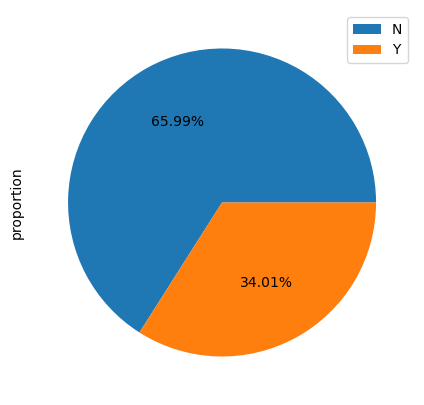

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


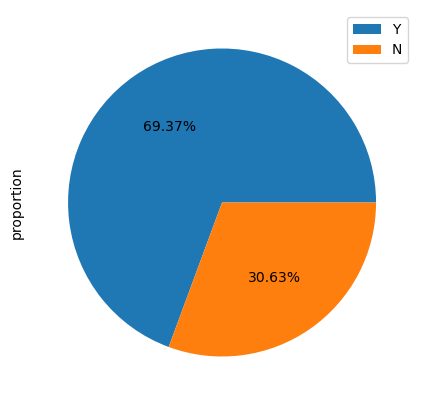

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


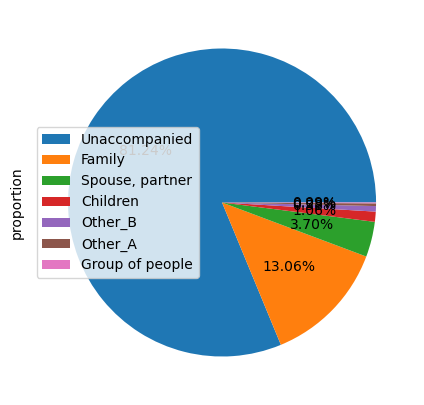

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


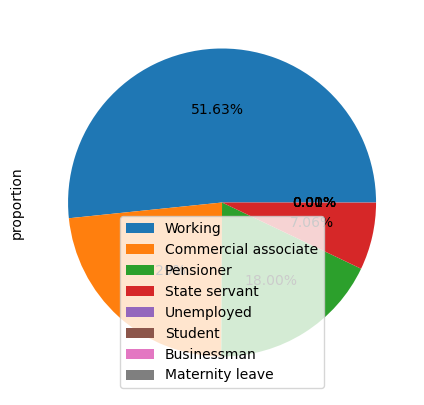

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


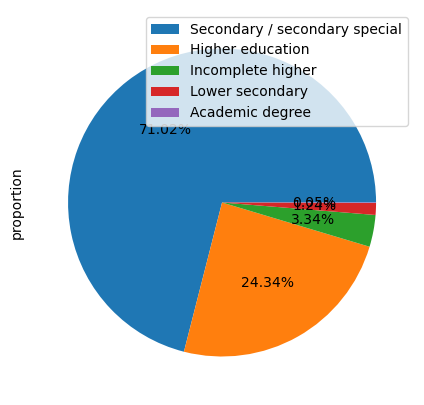

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


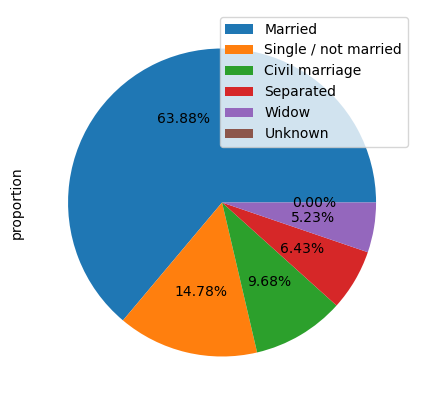

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


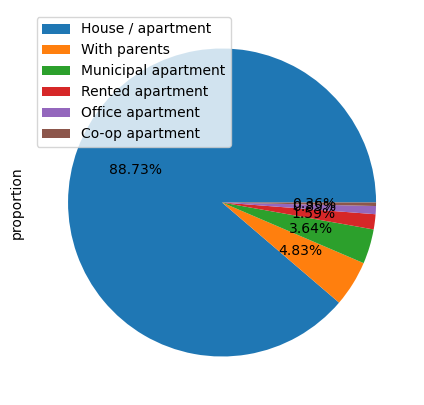

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


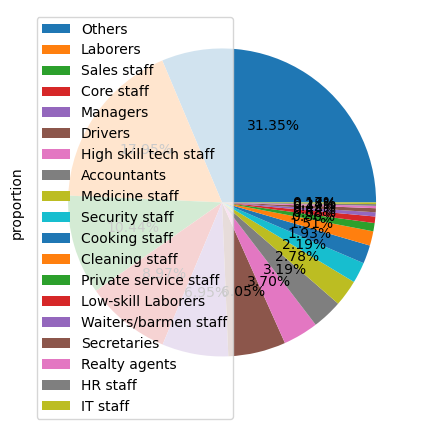

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


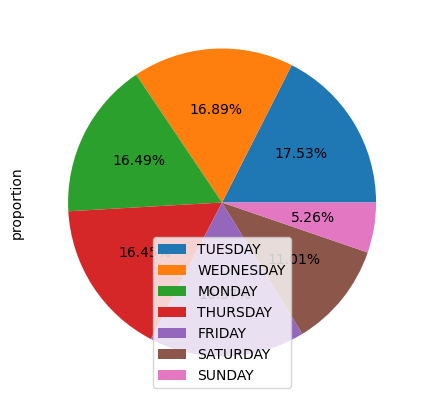

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

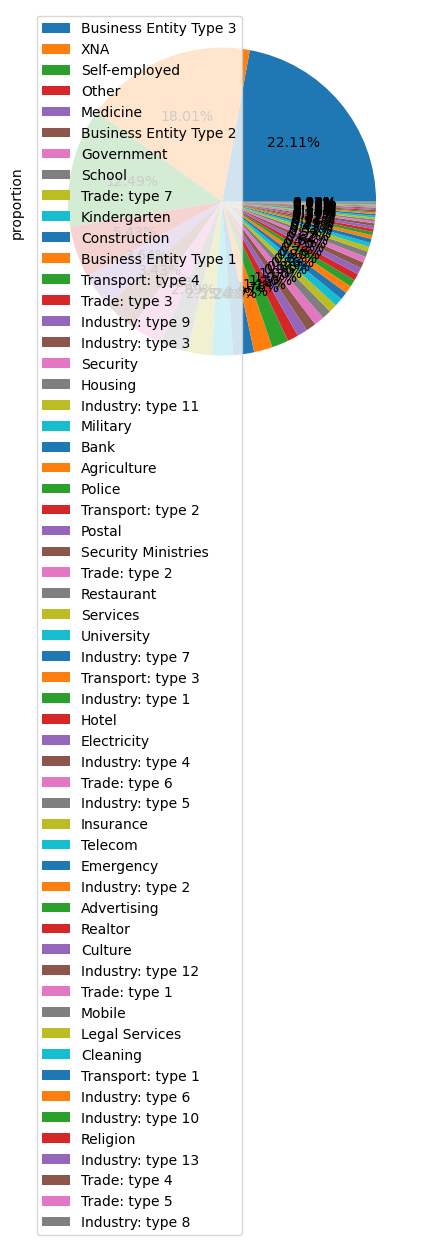

In [57]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize = [5 , 5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance = None , autopct = '%1.2f%%')
    plt.legend()
    plt.show()

# Conclusion >> Insights on below columns

1. NAME_CONTRACT_TYPE - More application have Cash loans than Revolving loans

2. CODE_GENDER - Number of Female applicants are twice than that of male applicants

3. FLAG_OWN_CAR - Most(70%) of the applicants do not own a car

4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house

5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied

6. NAME_INCOME_TYPE - Most(51%) of the applicants are earning their income from Work

7. NAME_EDUCATION_TYPE-71% of the applicants have completed Secondary/secondary special education

8. NAME_FAMILY_STATUS-63% of the applicants are marned

9. NAME_HOUSING_TYPE-88% of the housing type of applicants are House/apartment

10 OCCUPATION_TYPE-Most(31%) of the applicants have other Occupation type

11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday

12 ORGANIZATION_TYPE - Most of the Organization type of employees are Business Entity Type 3

In [58]:
#Plot on Numerical Columns
##Categorizing columns with and withiout flags 
num_cols_withoutflag = []
num_cols_withflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)
    

In [59]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [60]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
---------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
---------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
---------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64
---------------
count    307511.000000
mean      67724.742149
std      139443.751806
m

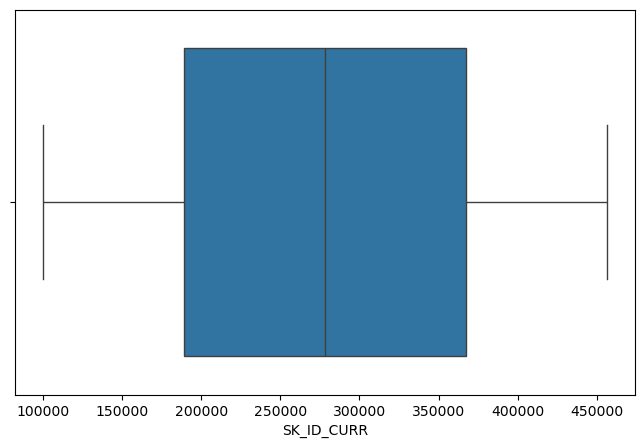

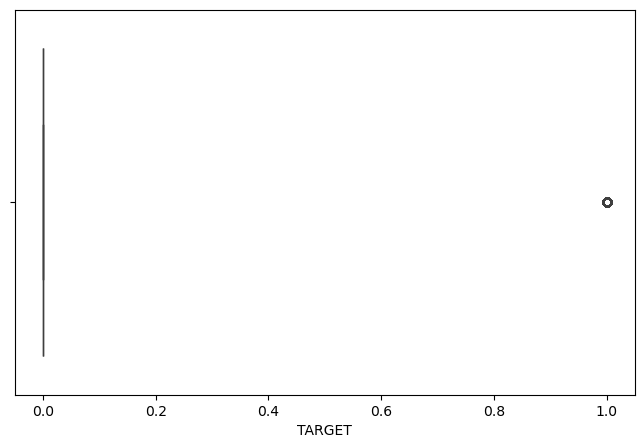

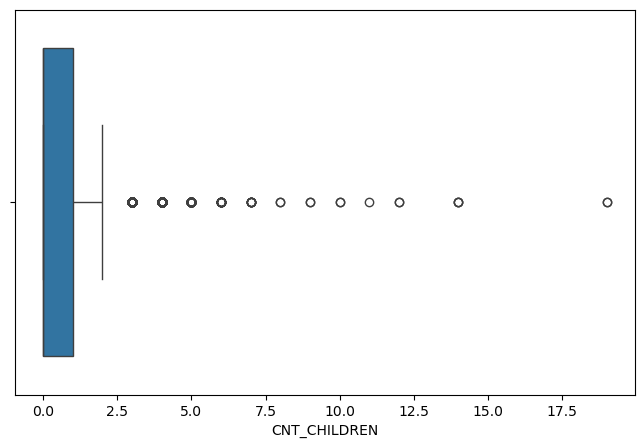

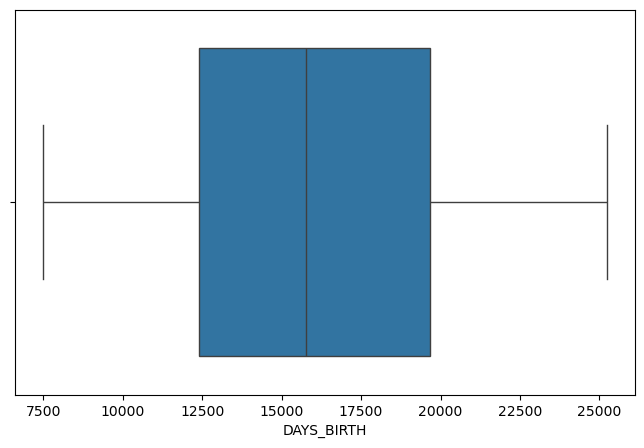

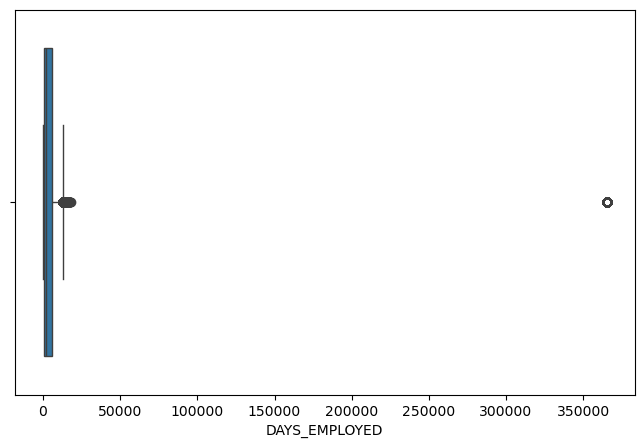

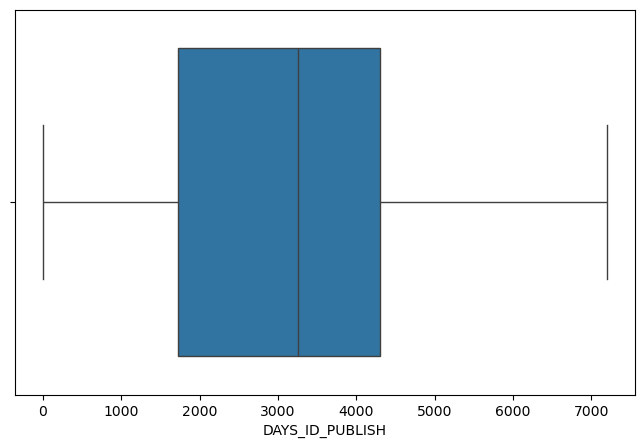

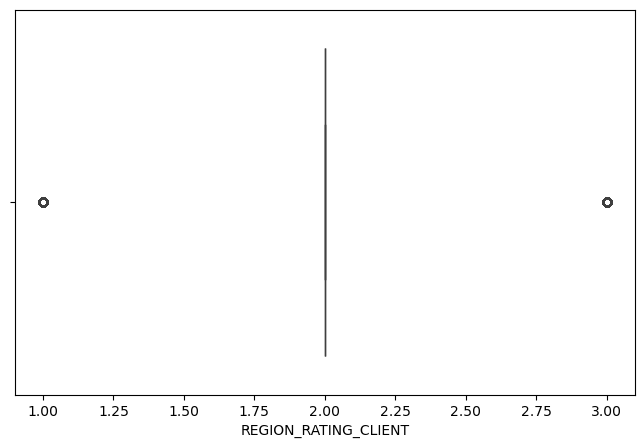

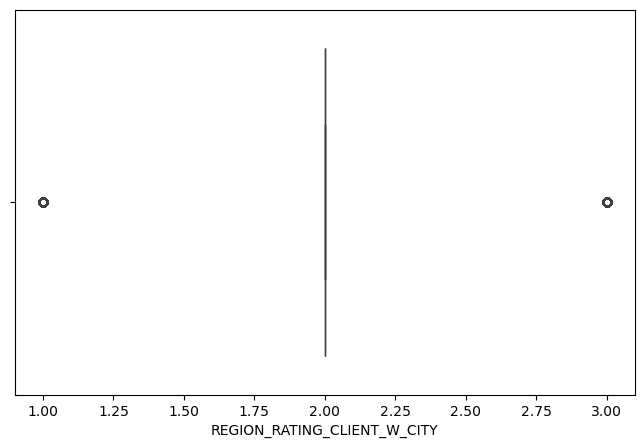

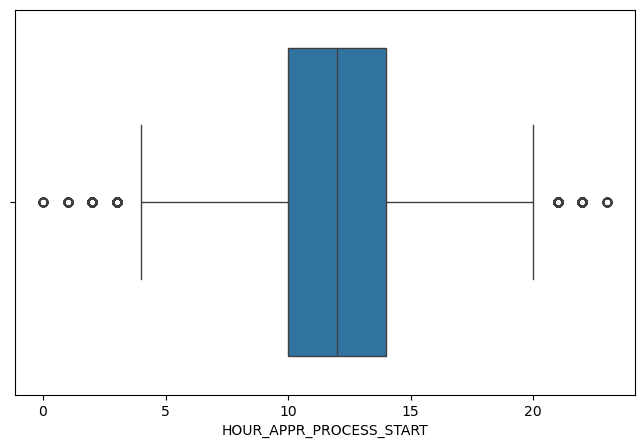

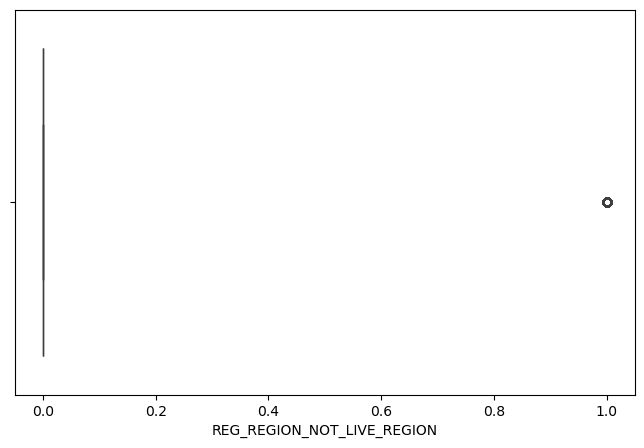

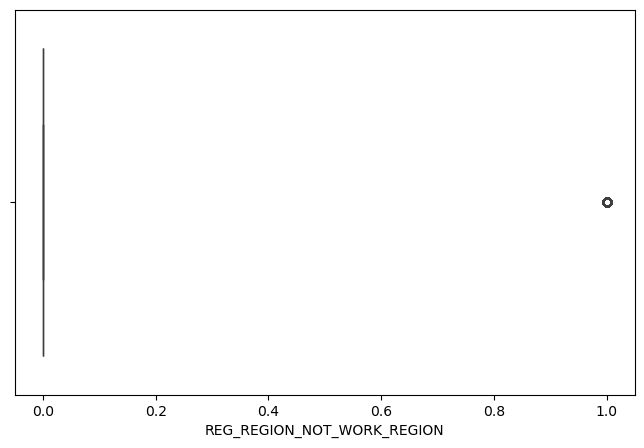

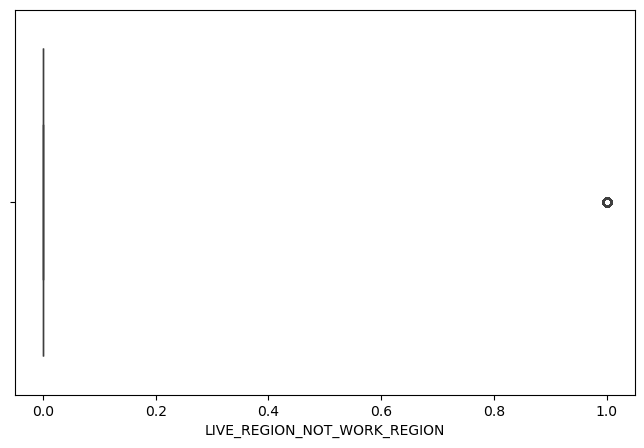

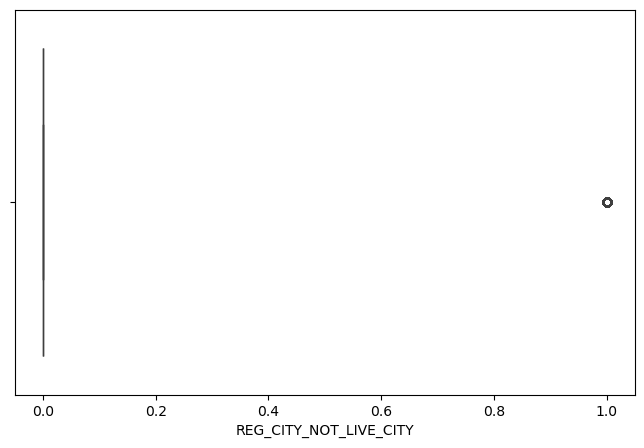

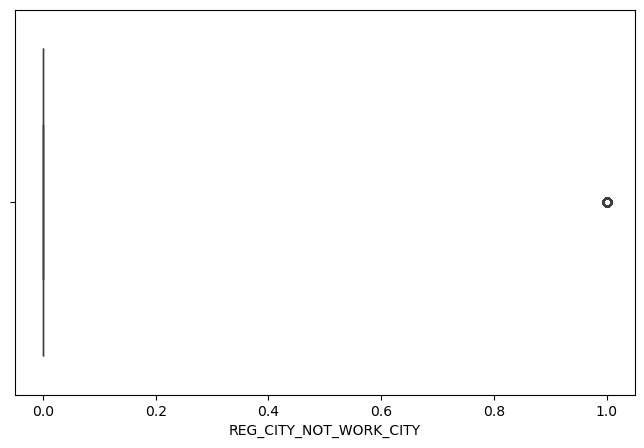

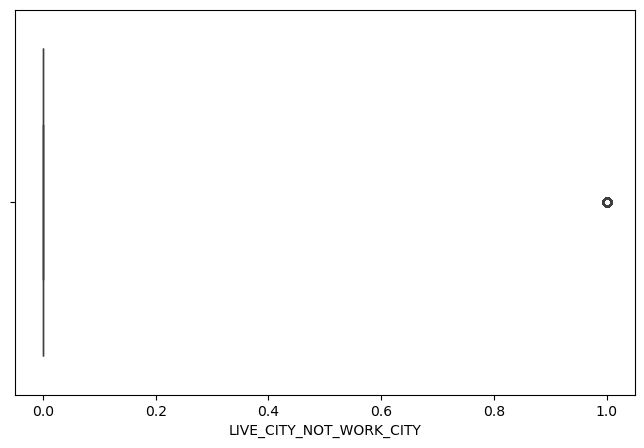

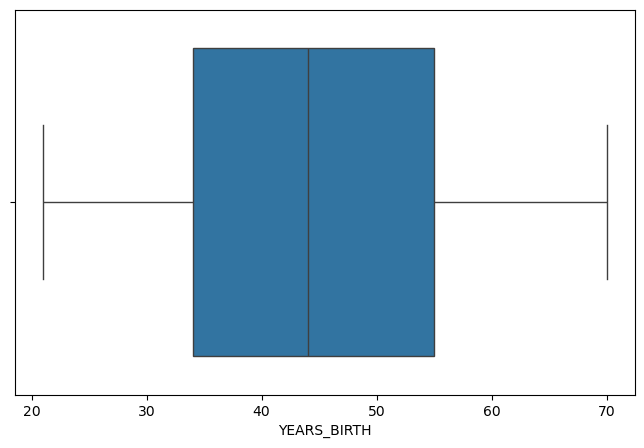

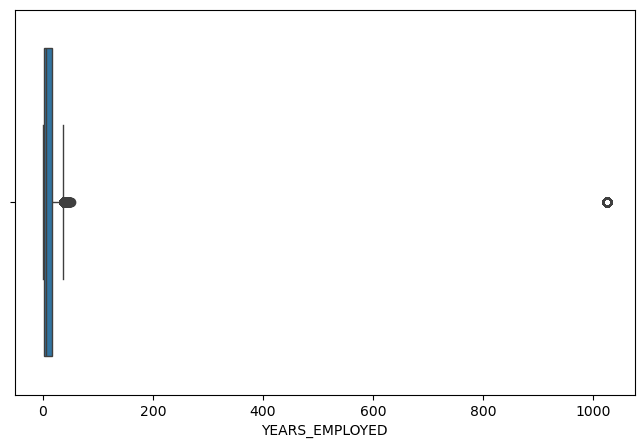

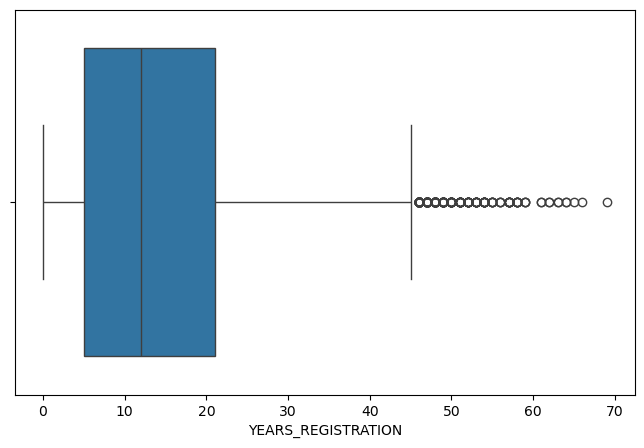

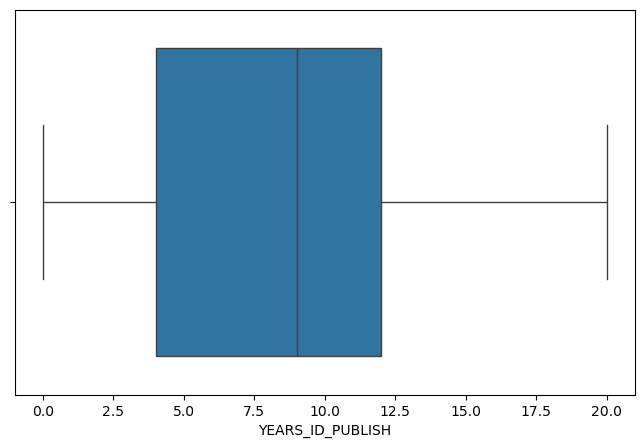

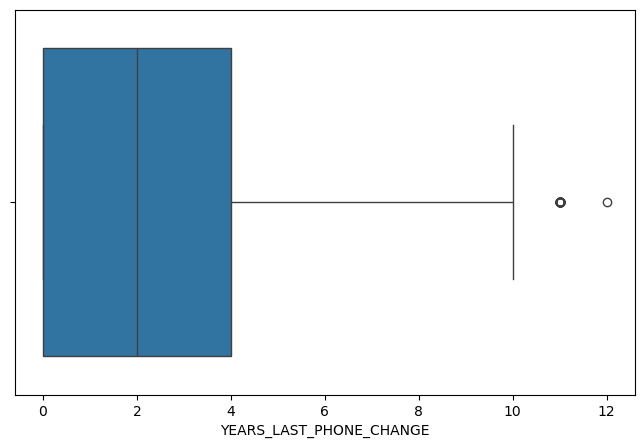

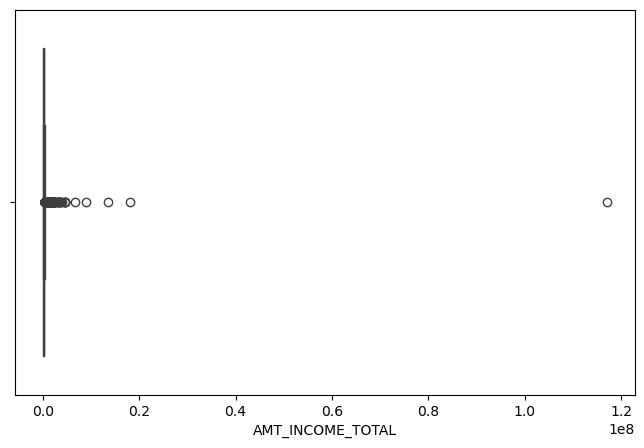

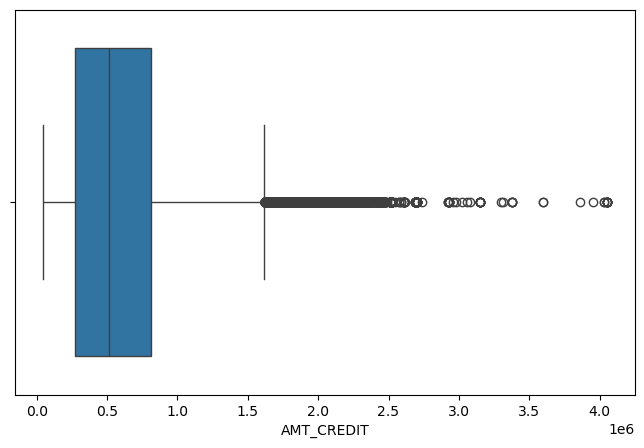

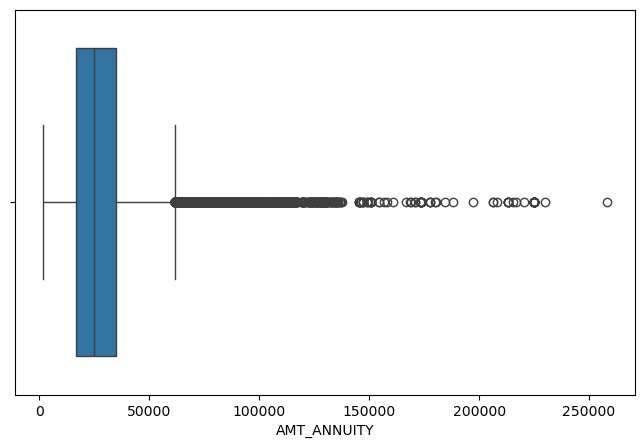

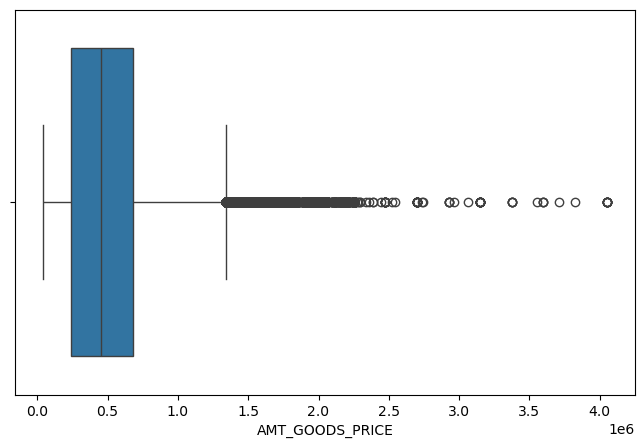

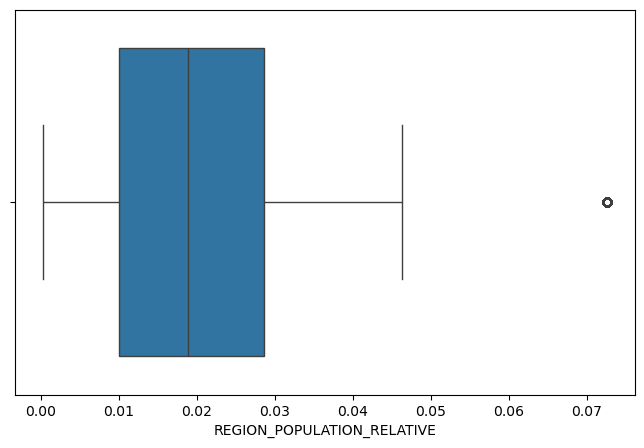

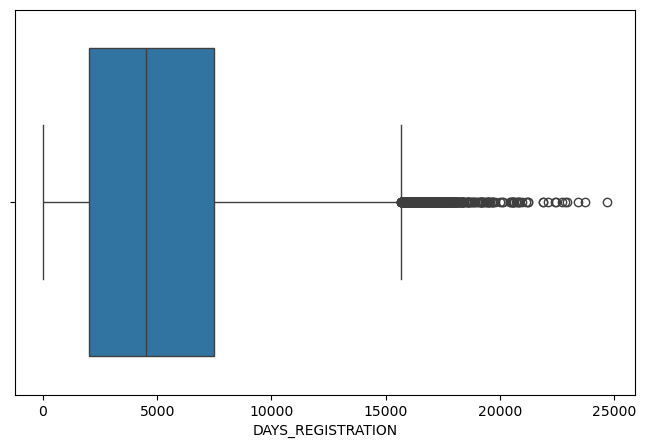

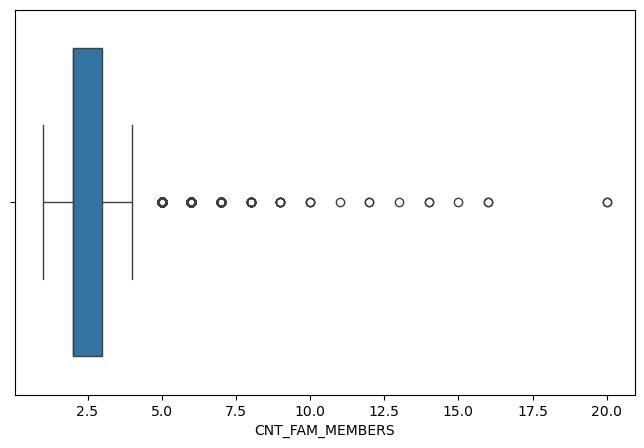

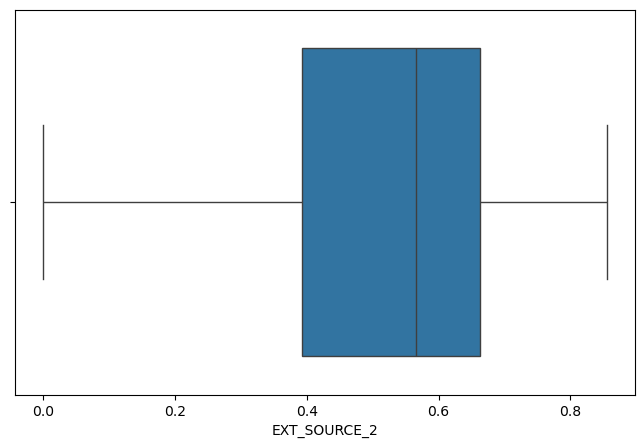

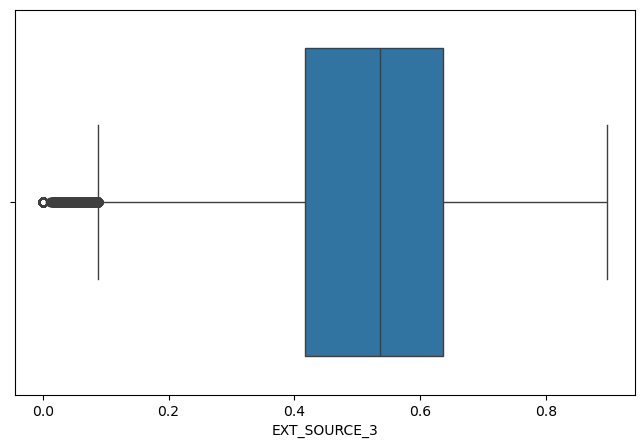

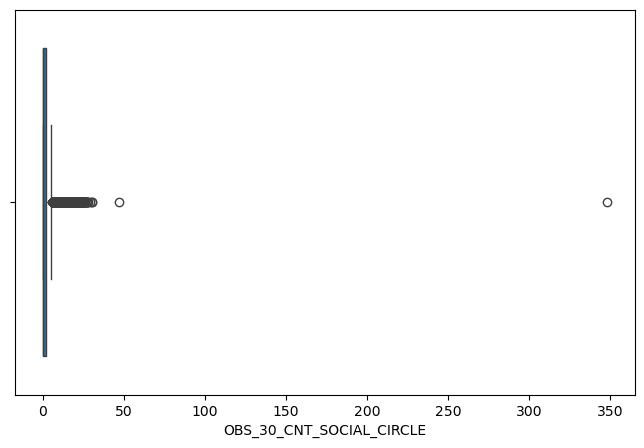

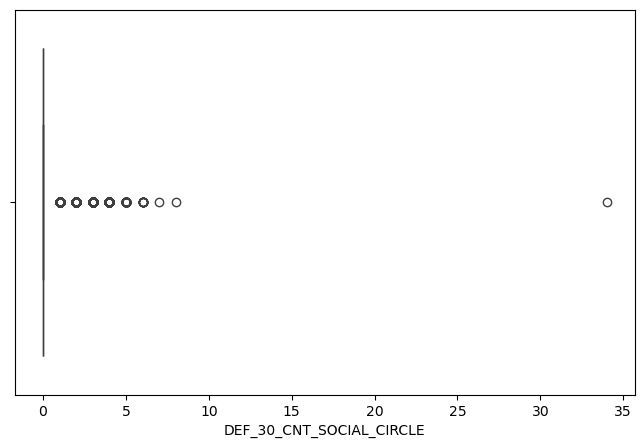

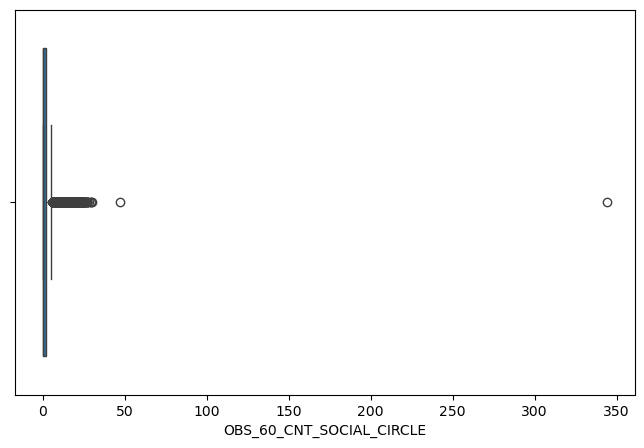

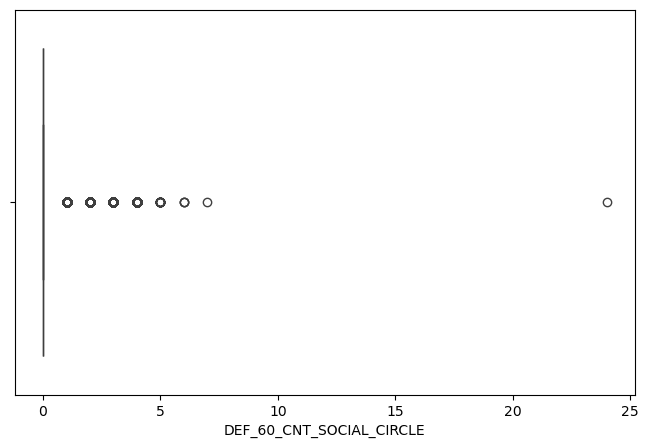

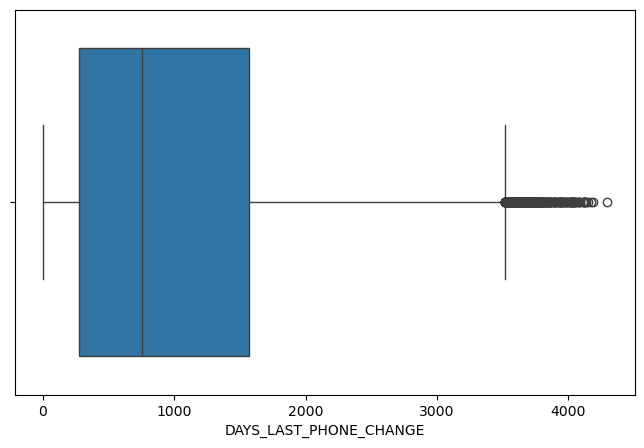

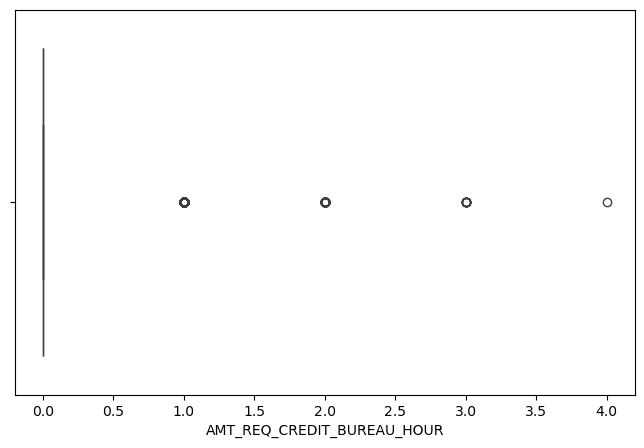

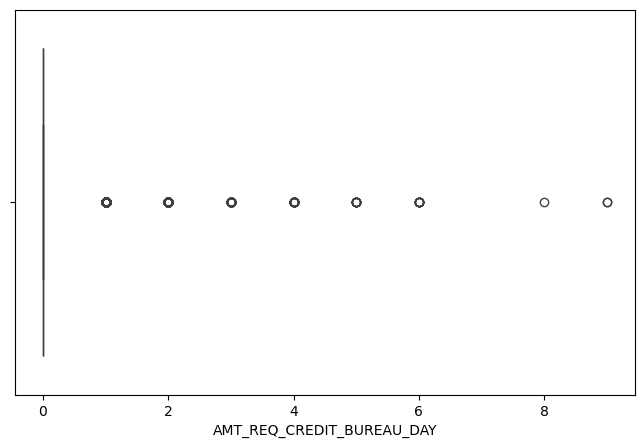

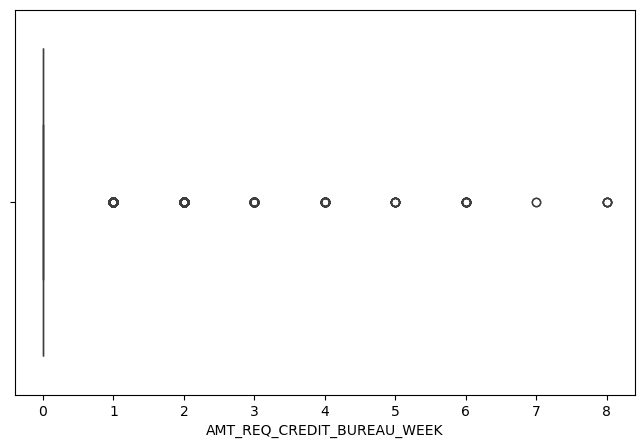

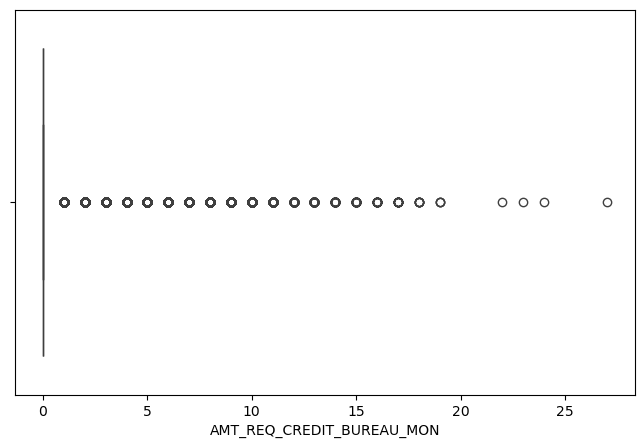

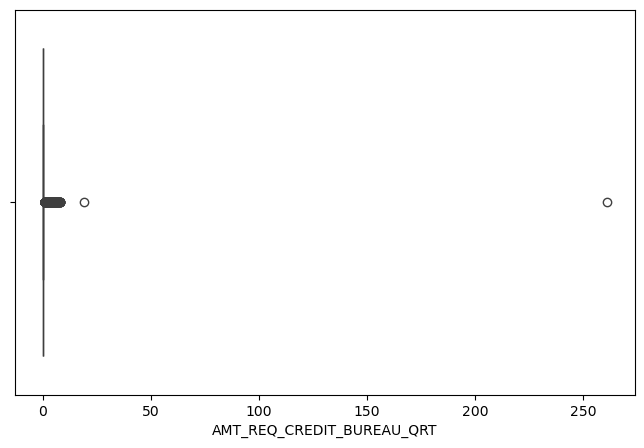

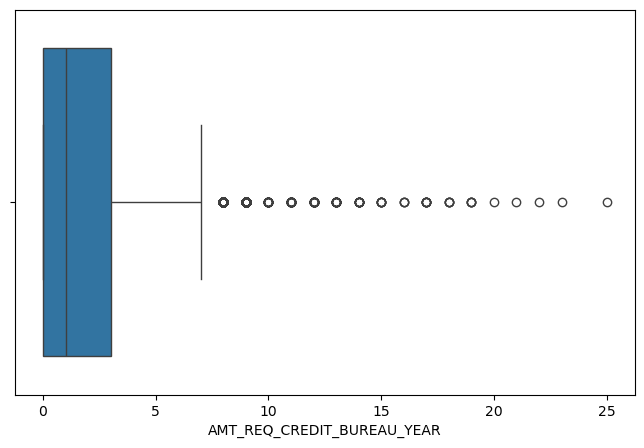

In [61]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize = [8,5] )
    sns.boxplot(data=app_df , x=col)
    print("---------------")

Conclusion >> Few Columns are with outliers are below

1 AMT_INCOME_TOTAL, Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

2 AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation

in mean and median due to outliers 3. AMT ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant

variation in mean and median due to outliers

4 AMT GOODS PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

5 REGION POPULATION RELATIVE Column has a one outliers and there not much difference between mean and median

Univariate Analysis on Columns with Target 0 and 1

plot on NAME_CONTRACT_TYPEfor Target 0 and 1


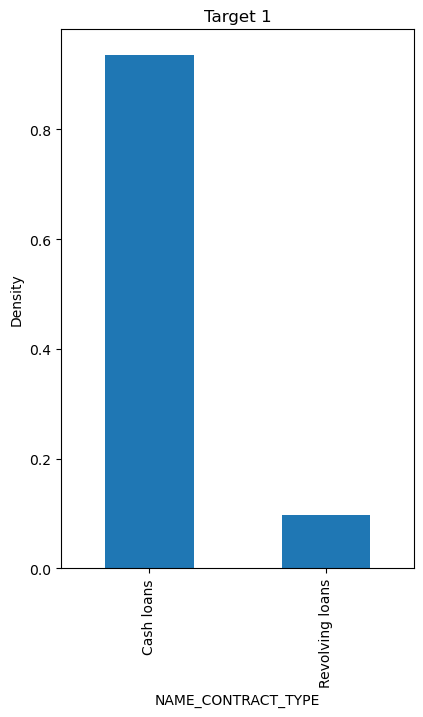



---------------------------------------------------------|n

plot on CODE_GENDERfor Target 0 and 1


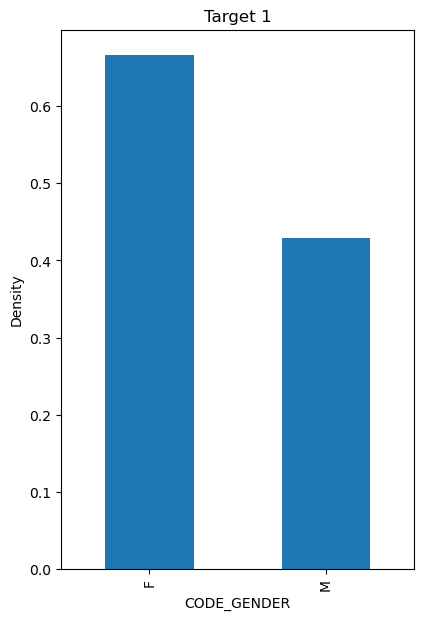



---------------------------------------------------------|n

plot on FLAG_OWN_CARfor Target 0 and 1


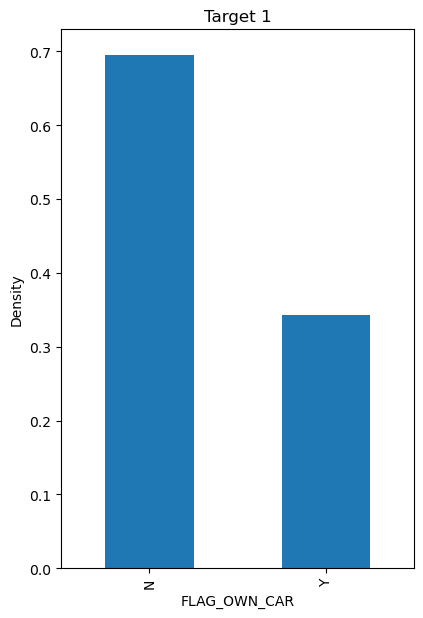



---------------------------------------------------------|n

plot on FLAG_OWN_REALTYfor Target 0 and 1


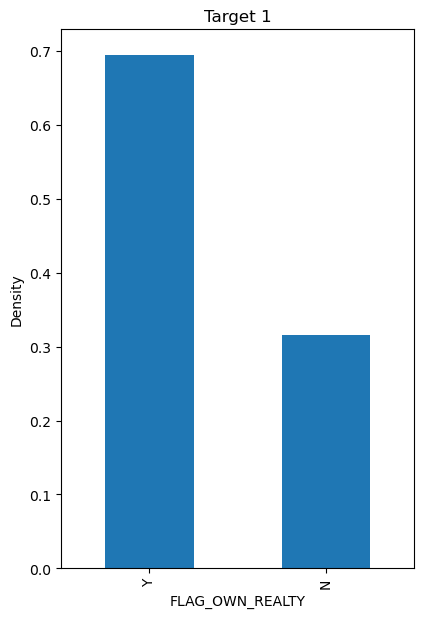



---------------------------------------------------------|n

plot on NAME_TYPE_SUITEfor Target 0 and 1


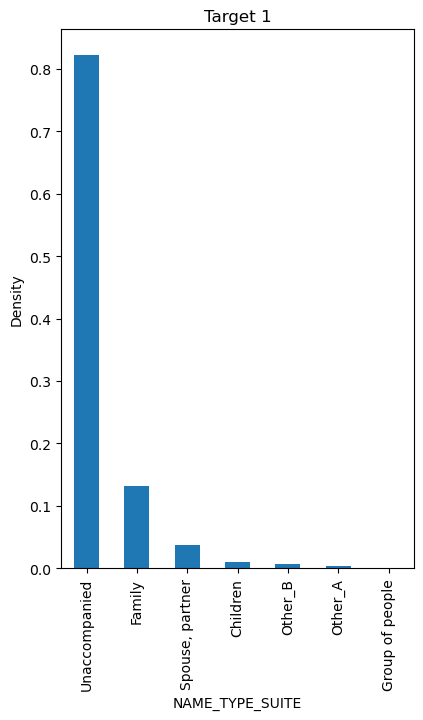



---------------------------------------------------------|n

plot on NAME_INCOME_TYPEfor Target 0 and 1


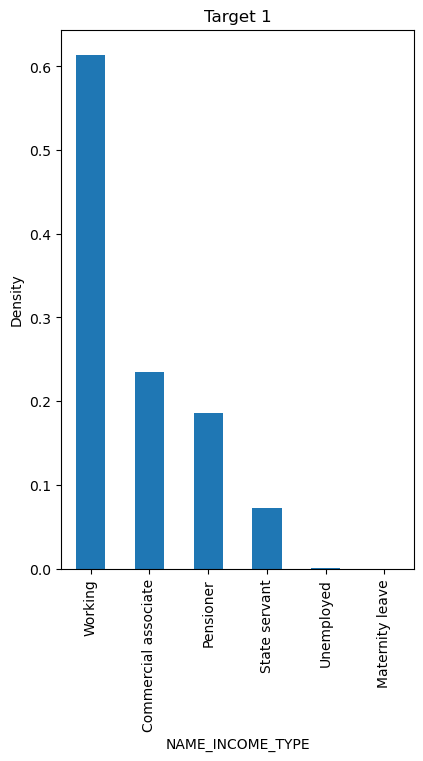



---------------------------------------------------------|n

plot on NAME_EDUCATION_TYPEfor Target 0 and 1


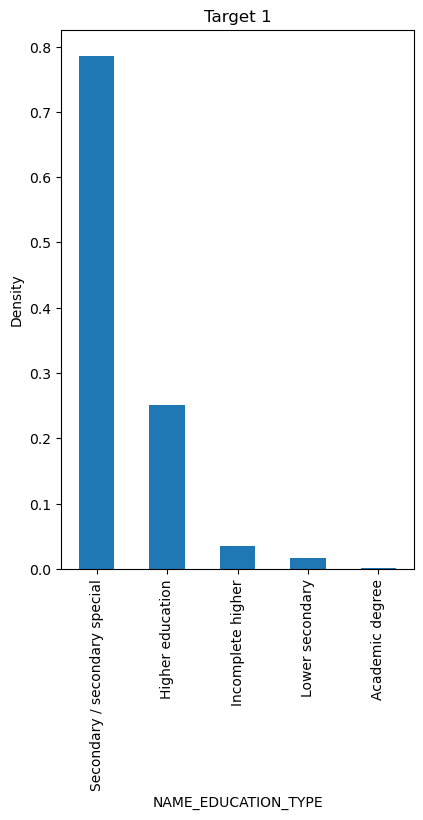



---------------------------------------------------------|n

plot on NAME_FAMILY_STATUSfor Target 0 and 1


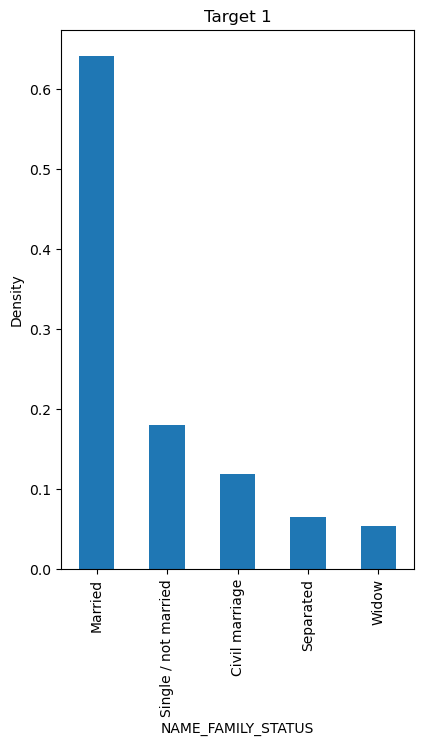



---------------------------------------------------------|n

plot on NAME_HOUSING_TYPEfor Target 0 and 1


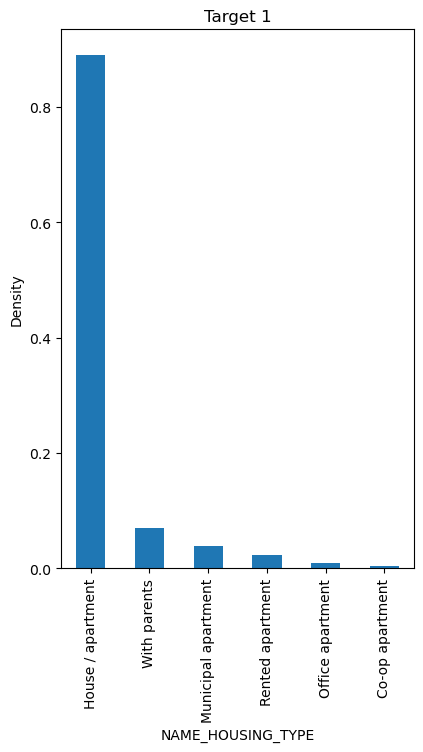



---------------------------------------------------------|n

plot on OCCUPATION_TYPEfor Target 0 and 1


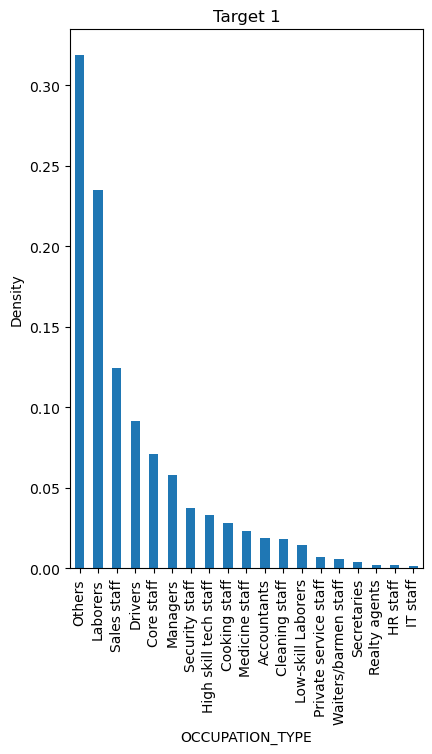



---------------------------------------------------------|n

plot on WEEKDAY_APPR_PROCESS_STARTfor Target 0 and 1


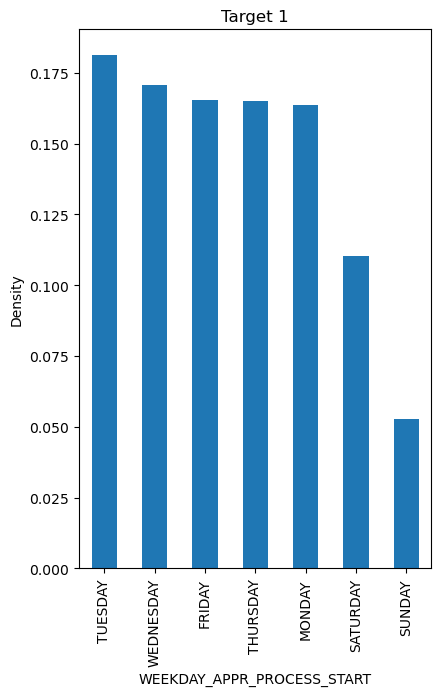



---------------------------------------------------------|n

plot on ORGANIZATION_TYPEfor Target 0 and 1


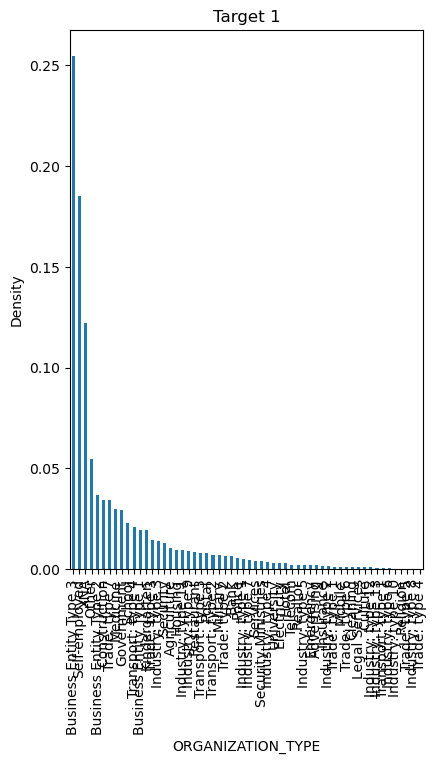



---------------------------------------------------------|n



In [62]:
for col in cat_cols:
    print(f"plot on {col}for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0 ")
    plt.xlabel(col)
    plt.ylabel("Density")
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n---------------------------------------------------------|n\n")

Conclusion >> Below are the column insights

1. NAME_CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1

2 CODE_GENDER Number of Female applicants are twice than that of male applicants both for Target 0 and 1

3. FLAG_OWN_CAR - Most(70%) of the applicants do not own a car both for Target 0 and 1

4. FLAG_OWN_REALTY-Most(70%) of the applicants do not own a house both for Target 0 and 1

5. NAME_TYPE_SUITE-Most(81%) of the applicants are Unaccompanied both for Target 0 and 1

6. NAME INCOME_TYPE - For both Target 0 and 1. Most(51%) of the applicants are earning their income from Work

7. NAME_EDUCATION_TYPE-For both Target 0 and 1, almost 71% of the applicants have completed Secondary/secondary special education

8. NAME FAMILY_STATUS-63% of the applicants are marned for both Target 0 and 1

9. NAME HOUSING_TYPE-88% of the housing type of applicants are House/apartment for both Target 0 and 1

10 OCCUPATION_TYPE-Most(31%) of the applicants have other Occupation type, are non defaulters and Laborere, Sales staff, Drivers and core statt are not able to repay the loan on time

11 WEEKDAY APPR_PROCESS_START-Most of the applicant have applied the loan on Tuseday and the least on Sunday

12 ORGANIZATION_TYPE - Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

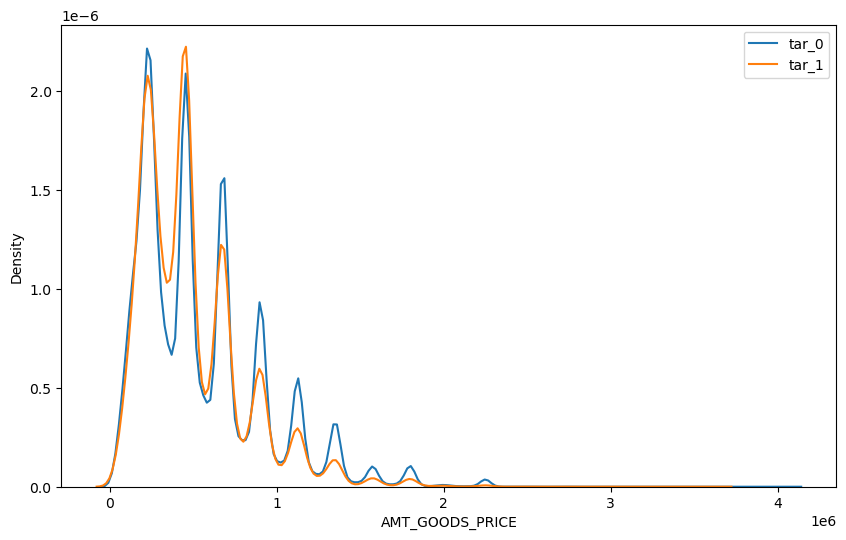

In [63]:
#Analysis on AMT_GOODS_PRICEE on Target 0 and 1
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'], label='tar_0', hist=False) 
sns.distplot(tar_1['AMT_GOODS_PRICE'], label='tar_1', hist=False)
plt.legend()
plt.show()

#Conclusion the price of the goods for which loan is given has the same variation for Target 0 and 1


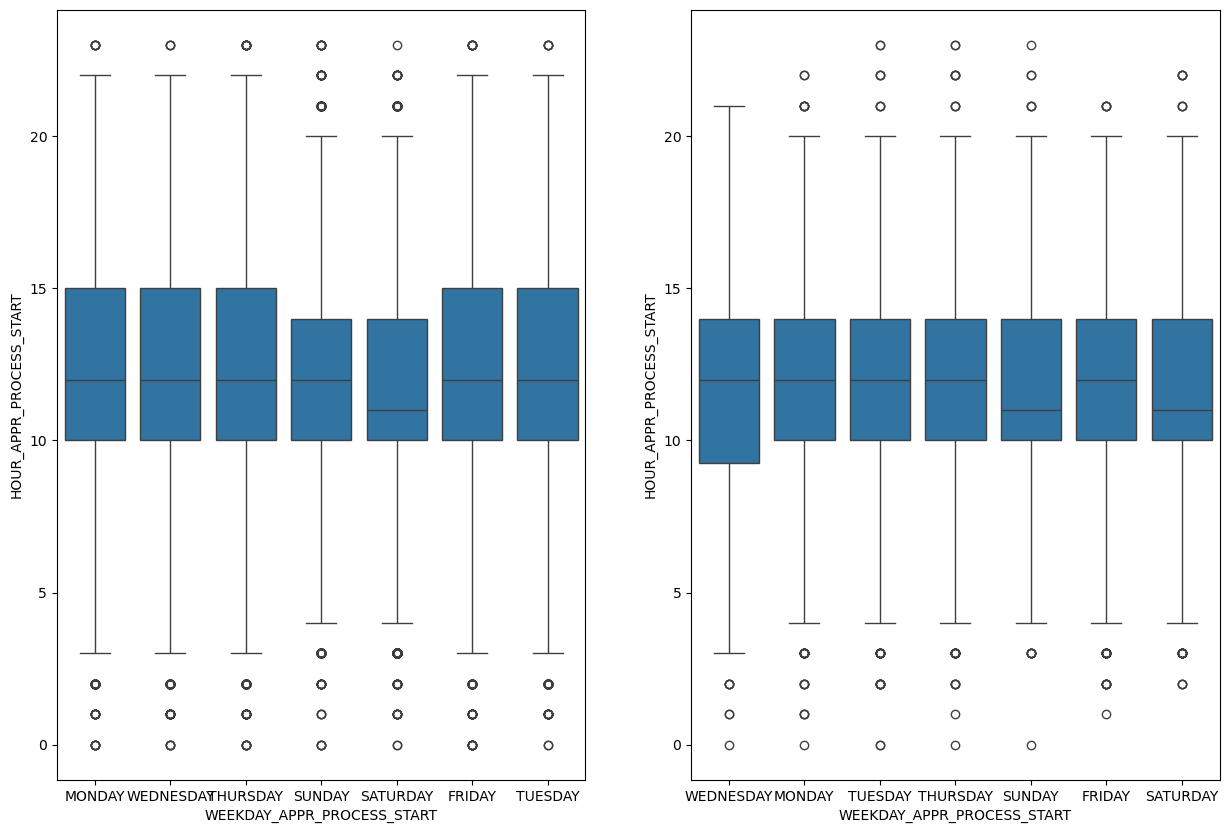

In [64]:
#Bivariate & Multivariate analysis
##Bivariate analysis between WEEKDAY_APPR_PROCESS_START v/s HOUR_APPR_PROCESS_START
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'WEEKDAY_APPR_PROCESS_START', y = 'HOUR_APPR_PROCESS_START', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x = 'WEEKDAY_APPR_PROCESS_START', y = 'HOUR_APPR_PROCESS_START', data=tar_1)
plt.show()

Conclusion >>>

1. The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm.

2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where the time is between 10am to 11am for both Target 0 and 1

3. The loan defaulters have applied for the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm

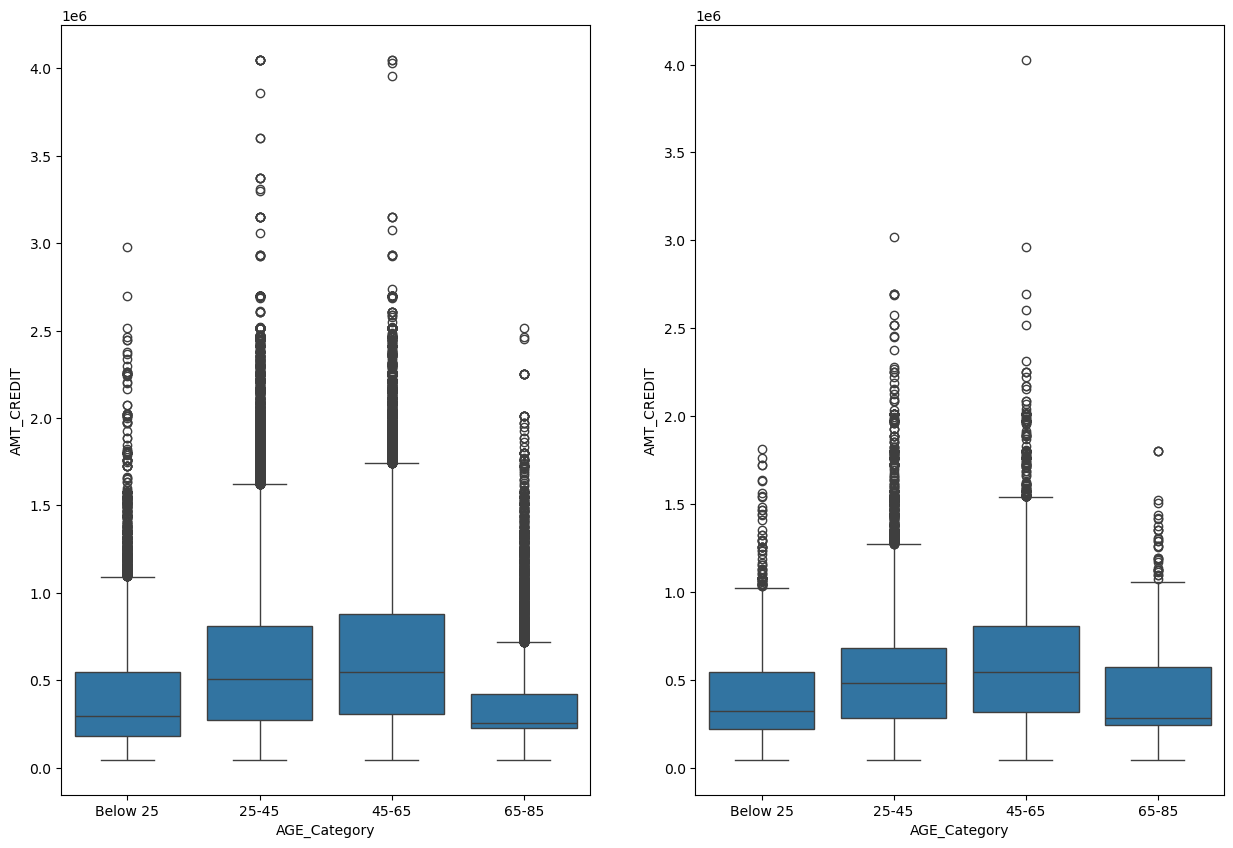

In [65]:
#Bivariate analysis between AGE_CATEGORY v/s AMT_CREDIT
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'AGE_Category', y = 'AMT_CREDIT', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x = 'AGE_Category', y = 'AMT_CREDIT', data=tar_1)
plt.show()


Conclusion >>

1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan properly

2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters

3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age



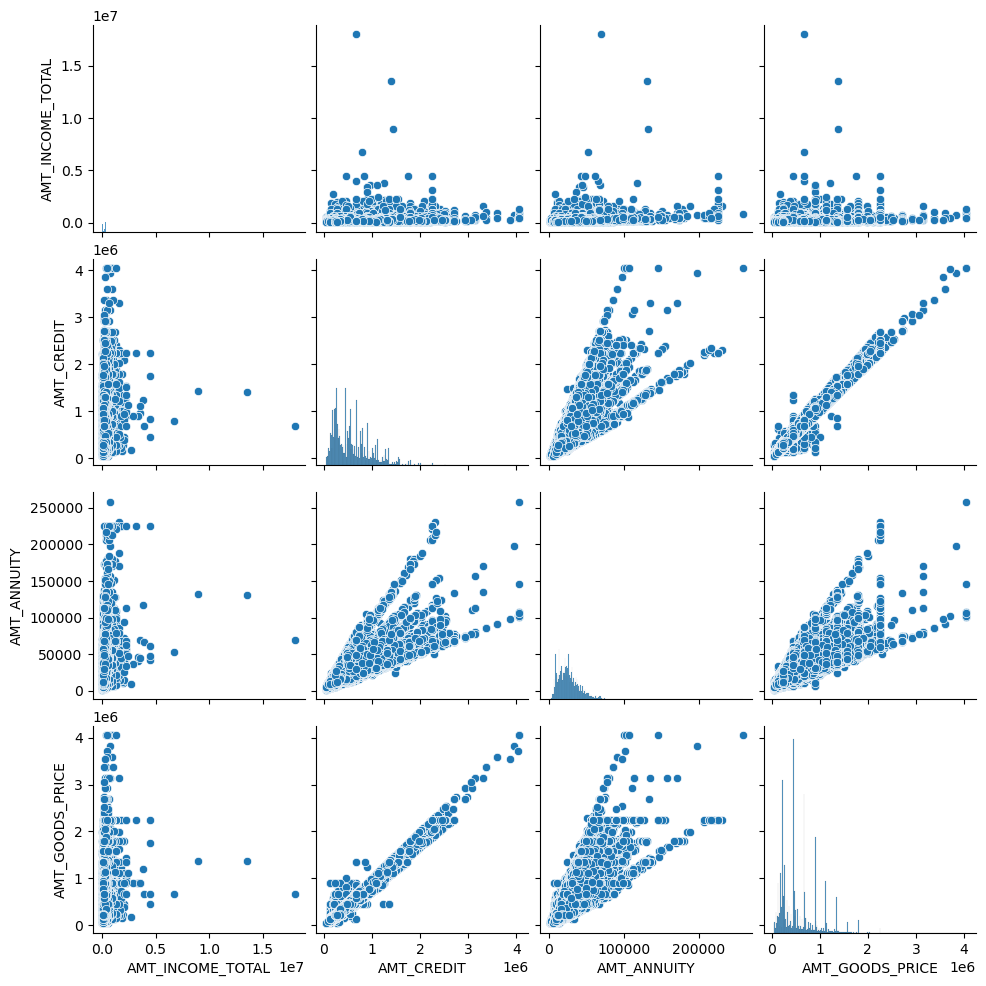

In [66]:
#Pair Plot of Amount Columns for Target 0
sns.pairplot(tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]) 
plt.show()

Conclusion >> For Applicants who are able to replay the loan on time

1. AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY

2. AMT_ANNUITY Increases with Increases in AMT_GOODS_PRICE and AMT_Credit

3. AMT GOODS_PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY

4. AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE



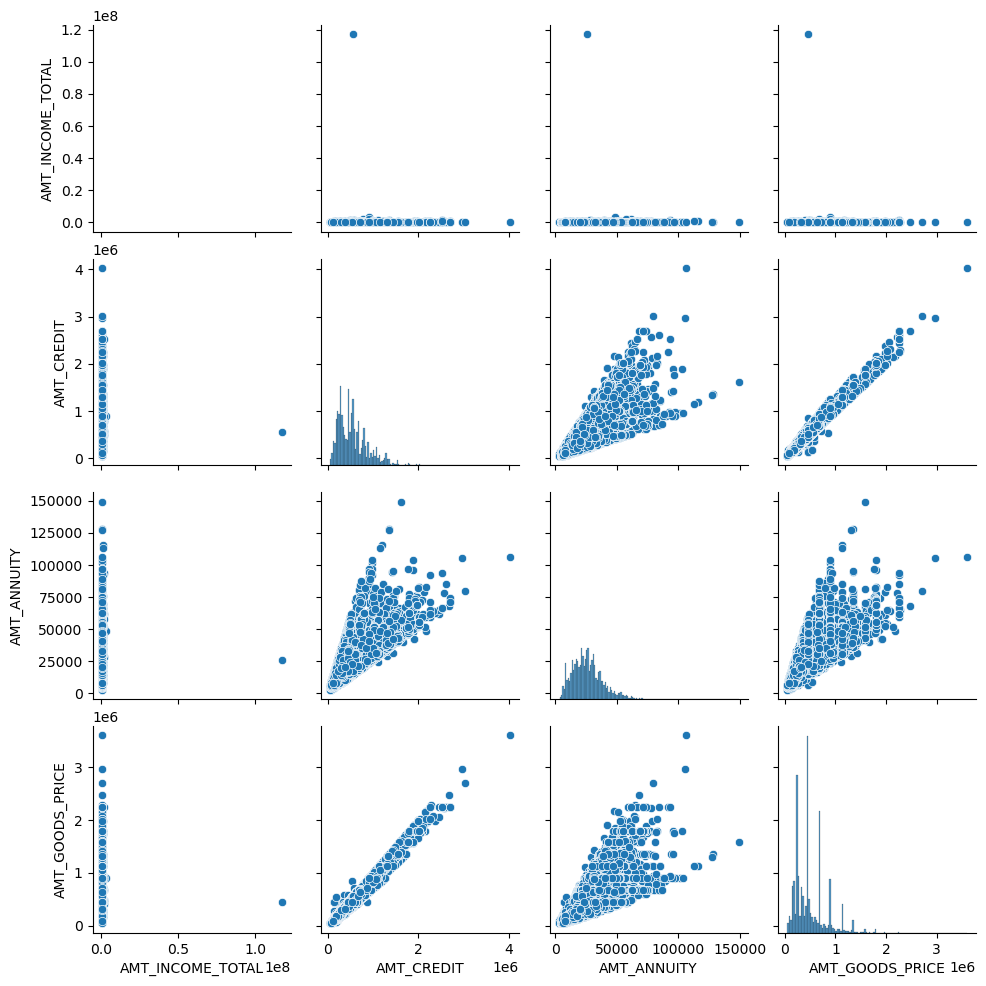

In [67]:
#Pair Plot of Amount Columns for Target 1
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

Conclusion >> For Applicants who are unable to replay the loan on time

1. AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY

2. AMT_ANNUITY Increases with Increases in AMT_GOODS_PRICE and AMT_Credit

3. AMT_GOODS_PRICE Increases with Increases in AMT_Credit and AMT ANNUITY

4. AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY AMT_GOODS_PRICE



In [68]:
#Co-relation between Numerial Columns
corr_data = app_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()               

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                  10                 5   
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [69]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
YEARS_BIRTH                     -0.027239    0.055373    -0.009519   
YEARS_EMPLOYED                  -0.063837   -0.064321    -0.102849   
YEARS_REGISTRATION              -0.027882   -0.009590    -0.038487   
YEARS_ID_PUBLISH                -0.008459    0.006942    -0.011376   
YEARS_LAST_PHONE_CHANGE          0.018571    0.077257     0.064494   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027239       -0.063837   
AMT_CREDIT                      0.986734     0.055373       -0.064321   
AMT_ANNUITY                     0.774837    -0.009519       -0.102849   
AMT_GOODS_PRICE                 1.000000     0.053449       -0.062193   
YEARS_BIRTH                     0.053449     1.000000        0.623745   
YEARS_EMPLOYED                 -0.062193     0.623745        1.000000   
YEARS_REGISTRATION             -0.011518     0.331856        0.214652   
YEARS_ID_PUBLISH                0.009647     0.272054        0.274644   
YEARS_LAST_PHONE_CHANGE         0.079349     0.086317       -0.016424   

                         YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027882         -0.008459   
AMT_CREDIT                        -0.009590          0.006942   
AMT_ANNUITY                       -0.038487         -0.011376   
AMT_GOODS_PRICE                   -0.011518          0.009647   
YEARS_BIRTH                        0.331856          0.272054   
YEARS_EMPLOYED                     0.214652          0.274644   
YEARS_REGISTRATION                 1.000000          0.101831   
YEARS_ID_PUBLISH                   0.101831          1.000000   
YEARS_LAST_PHONE_CHANGE            0.058393          0.092803   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018571  
AMT_CREDIT                              0.077257  
AMT_ANNUITY                             0.064494  
AMT_GOODS_PRICE                         0.079349  
YEARS_BIRTH                             0.086317  
YEARS_EMPLOYED                         -0.016424  
YEARS_REGISTRATION                      0.058393  
YEARS_ID_PUBLISH                        0.092803  
YEARS_LAST_PHONE_CHANGE                 1.000000

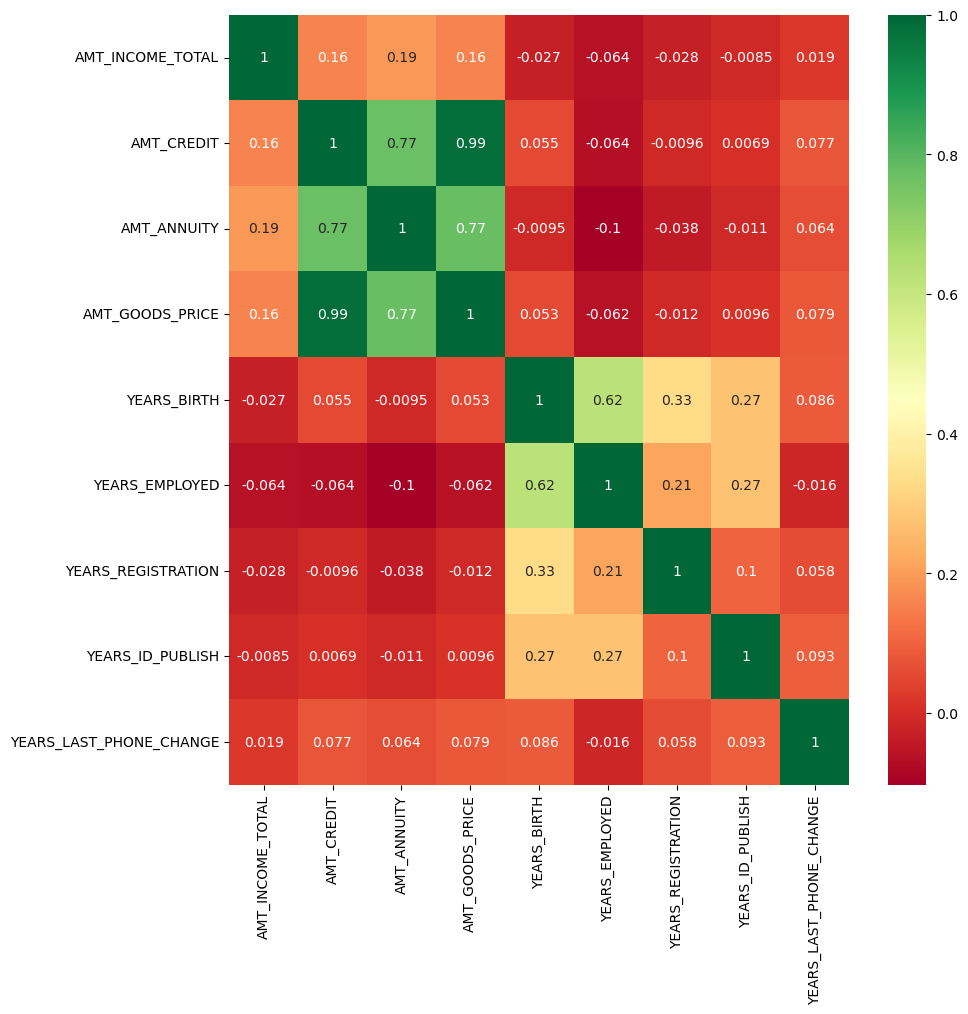

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

Conclusion >>

1. AMT_INCOME_TOTAL-It has a positive corelation index of 0.16.0.19.0.16 with AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE respectively 

2. AMT_CREDIT-Is has negative coreltaion index of 0.064 with YEARS_EMPLOYED and positive coreltaion index of 0.99,0.77 with AMT_GOODS_PRICE AMT ANNUITY respectively.

3. AMT ANNUITY - Is has negative coreltaion index of 0.1 with YEARS_EMPLOYED and positive coreltaion index of 0.77 with AMT_CREDIT 

4. AMT_GOODS_PRICE - It has a positive corelation with AMT_CREDIT AMT_ANNUITY

5. YEARS BIRTH - It has a positive corelation with YEARS_EMPLOYED, AMT_GOODS_PRICE and negative coreltaion with AMT_ANNUITY AMT_INCOME_TOTAL

6. YEARS_EMPLOYED - Is has negative coreltaion index of 0.1 with AMT_ANNUITY and has a positive corelation with YEARS_REGISTRATION. YEARS_ID_PUBLISH

7. YEARS REGISTRATION - It has a positive corelation with YEARS_ID_PUBLISH, YEARS_BIRTH, YEARS_EMPLOYED

8. YEARS ID_PUBLISH-It has a positive corelation with YEARS_REGISTRATION and negative coreltaion with AMT_INCOME_TOTALAMT_ANNUITY

9. YEARS LAST_PHONE_CHANGE - It has negative coreltaion with YEARS_EMPLOYED and positive corelation with AMT_GOODS_PRICE, YEARS_ID_PUBLISH

In [71]:
#Split the numerical variables based on target 0 & 1 to find the co-relation
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()   

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   
5           99000.0    490495.5      27517.5         454500.0           47   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   
5               4                  13                 1   

   YEARS_LAST_PHONE_CHANGE  
1                        2  
2                        2  
3                        1  
4                        3  
5                        7

In [72]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()   

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           26   
26          112500.0    979992.0      27076.5         702000.0           52   
40          202500.0   1193580.0      35028.0         855000.0           49   
42          135000.0    288873.0      16258.5         238500.0           37   
81           81000.0    252000.0      14593.5         252000.0           69   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                1                  10                 5   
26               7                  18                 5   
40               3                   3                 2   
42              10                   0                12   
81            1025                  15                11   

    YEARS_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        3  
42                        4  
81                        0

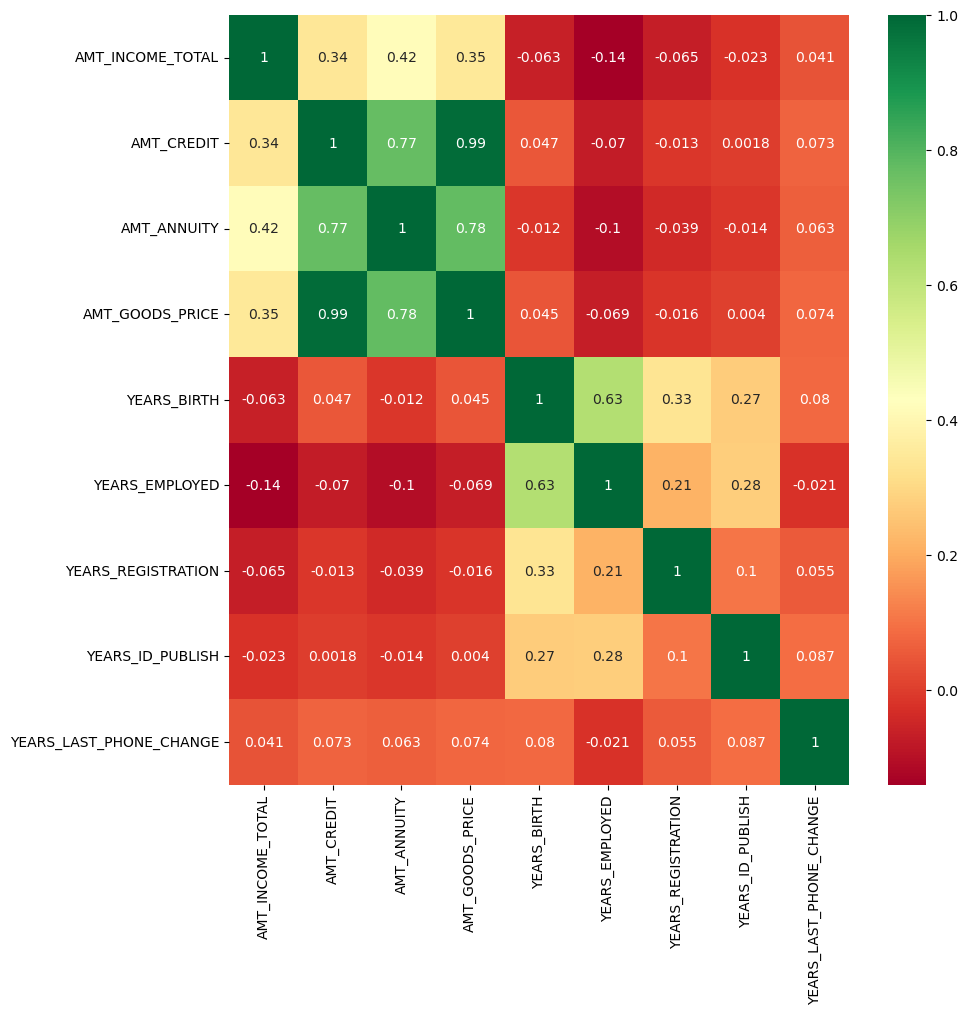

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(), annot=True, cmap="RdYlGn")
plt.show()

Conclusion >>

1. AMT_INCOME_TOTAL-It has a positive corelation index of 0.34,0.42,0.35 with AMT_CREDIT, AMT_ANNUITY AMT_GOODS_PRICE respectively and Negative with most of the other Year columns

2. AMT CREDIT-Is has a strong positive coreltaion index of 0.99.0.77 with AMT_GOODS_PRICE, AMT_ANNUITY respectively.

3 AMT ANNUITY-Is has positive coreltaion index of 0.77,0.78 with AMT_CREDIT,AMT_GOODS_PRICE respectively and Negative with most of the other Year columns

4. AMT_GOODS_PRICE - It has a strong positive corelation index 0.78,0.99 with AMT_ANNUITY, AMT_CREDIT

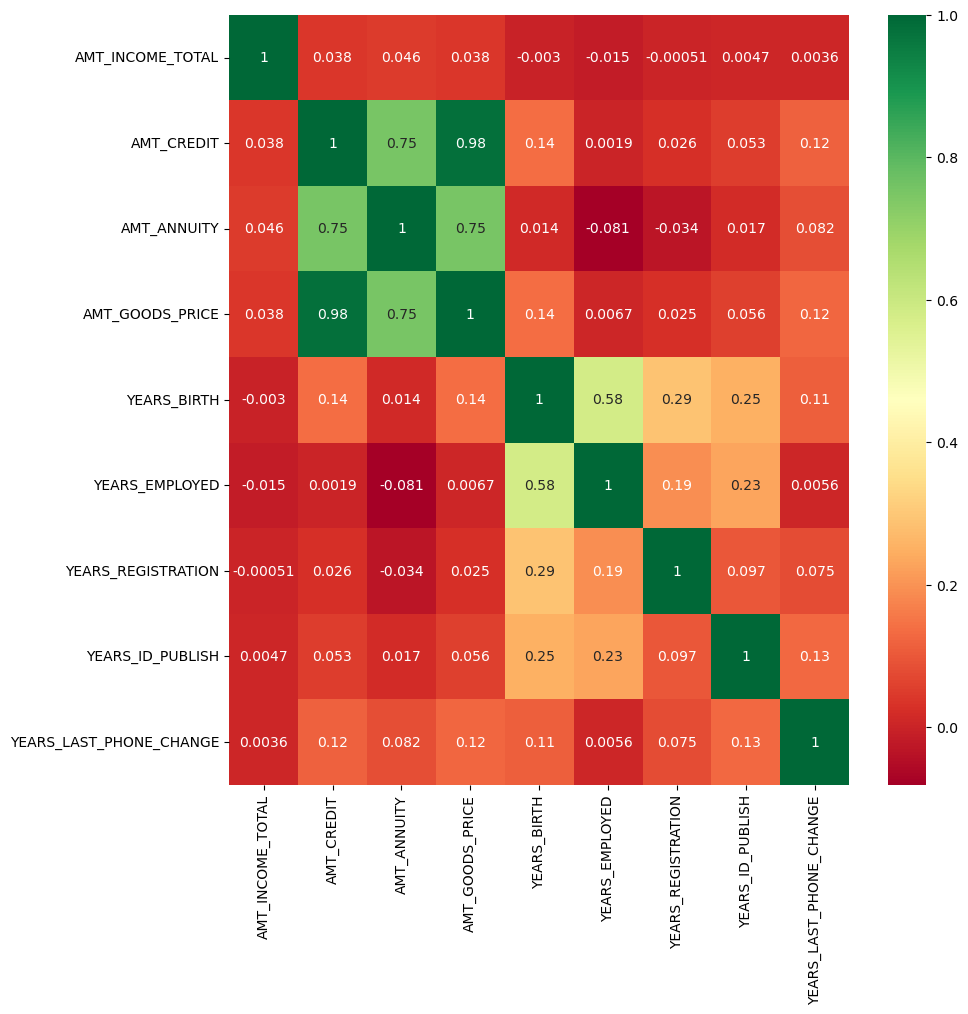

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(), annot=True, cmap="RdYlGn")
plt.show()

Conclusion >>

1. AMT_INCOME_TOTAL - It is less correlated with AMT_CREDIT AMT_ANNUITY, AMT_GOODS_PRICE respectively

2. AMT_CREDIT - Is has a strong positive coreltaion index of 0.98,0.75 with AMT_GOODS_PRICE, AMT_ANNUITY respectively and also positive corelation with other Year Columns

3. AMT_ANNUITY - Is has positive coreltaion index of 0.75 with AMT_CREDIT AMT_GOODS_PRICE and Negative with YEAR_EMPLOYED, YEAR_REGISTRATION

4. AMT_GOODS_PRICE - It has a strong positive corelation index 0.75,0.98 with AMT_ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns



#Read previous application csv

In [75]:
papp_data = pd.read_csv(r"D:\1Stop.ai Projects\project 2 credit EDA\previous_application.csv")
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [76]:
#Data Inspection on application csv dataset
##Get info and shape on the dataset
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [77]:
papp_data.shape

(1670214, 37)

#Data quality cheak 
##Check for percentage null values in application csv dataset


In [78]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [79]:
percentage = 49 
threshold_p = int(((100-percentage)/100)*papp_data.shape[0]+1)
papp_df = papp_data.dropna(axis=1, how = 'any')
papp_df = papp_data.dropna(axis=1, thresh=threshold_p)
papp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4          

In [80]:
papp_df.shape

(1670214, 32)

In [81]:
#impute missing values 
##check the dtype of  missing values in application csv dataset before imputing values

for col in papp_df.columns:
    if papp_df[col].dtype == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x: abs(x))

Validate if any null vlaues present in dataset

In [82]:
null_cols = list(papp_df.columns[papp_df.isna().any()])
len(null_cols)

11

In [83]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

Binning of continuos variables
Binning AMT_CREDIT Column

In [84]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [85]:
papp_df["AMT_CREDIT_Category"] = pd.cut(papp_df.AMT_CREDIT, [0, 200000 , 400000 , 600000 , 800000 , 1000000], 
                                       labels = ["Very low credit" , "Low credit" , "Medium credit" , "High credit" , "Very high credit"])

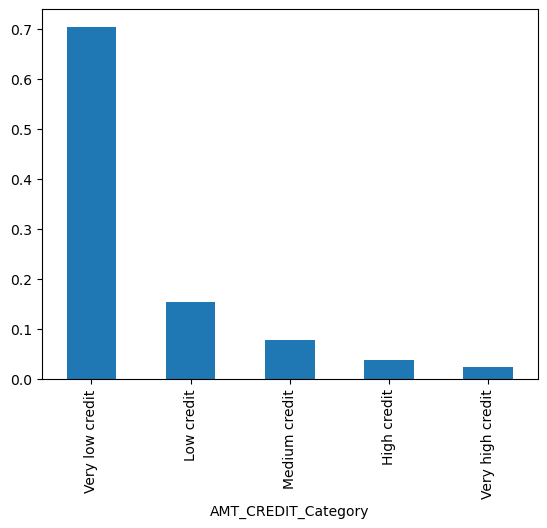

In [86]:
papp_df["AMT_CREDIT_Category"].value_counts(normalize = True).plot.bar()
plt.show()

In [87]:
papp_df["AMT_CREDIT_Category"] = pd.cut(papp_df.AMT_CREDIT, [0, 200000 , 400000 , 600000 , 800000 , 1000000], 
                                       labels = ["Very low credit" , "Low credit" , "Medium credit" , "High credit" , "Very high credit"])

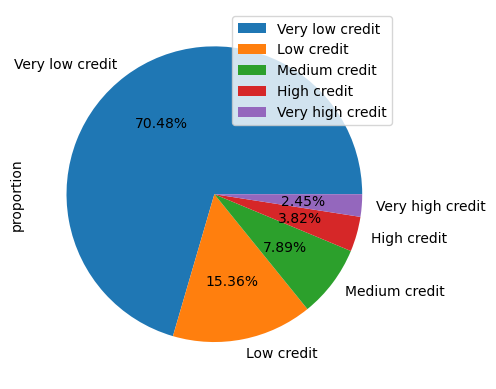

In [88]:
papp_df["AMT_CREDIT_Category"].value_counts(normalize = True ).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

Data Imbalance check

Dividing Application Dataset with NAME_CONTRACTS_STATUS

In [89]:
approved = papp_df [papp_df.NAME_CONTRACT_STATUS == "Approved"]
cancelled = papp_df [papp_df.NAME_CONTRACT_STATUS == "Canceled"] 
refused = papp_df [papp_df.NAME_CONTRACT_STATUS == "Refused"]
unused = papp_df [papp_df.NAME_CONTRACT_STATUS == "Unused offer"]

In [90]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

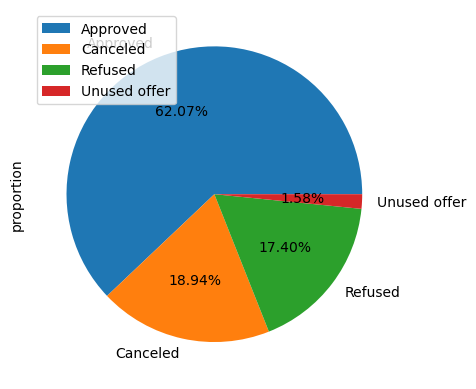

In [91]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.2f%%') 
plt.legend() 
plt.show()

Conclusion >> 62% of the Applicants have the loan approved, 19%, 17% applicants are rejected or canceled and 2% are unused

Univariate Analysis

cat_cols list(papp_df.columns[papp_df.dtypes np.object]) 
num_cols = list(papp_df.columns[papp_df.dtypes== np.int64]) + list(papp_df.columns[papp_df.dtypes== np.float64])

In [92]:
cat_cols = list(papp_df.columns[papp_df.dtypes == object]) 
num_cols = list(papp_df.columns[papp_df.dtypes== np.int64]) + list(papp_df.columns[papp_df.dtypes== np.float64])

In [93]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [94]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [95]:
cat_cols = ['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [96]:
num_cols = [
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

NAME_CONTRACT_TYPE
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: proportion, dtype: float64


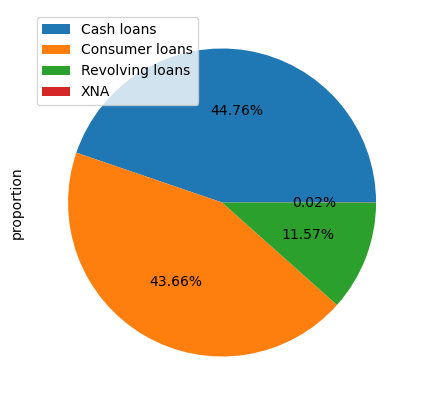

-------------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: proportion, dtype: float64


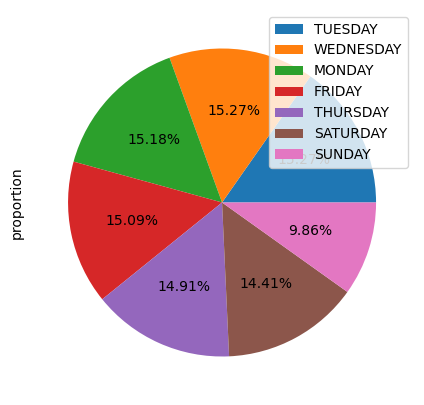

-------------------
FLAG_LAST_APPL_PER_CONTRACT
Y    99.49258
N     0.50742
Name: proportion, dtype: float64


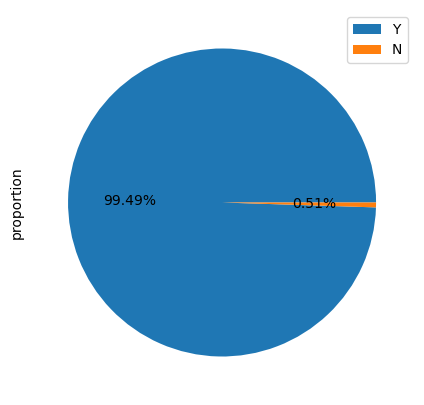

-------------------
NAME_CASH_LOAN_PURPOSE
XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          

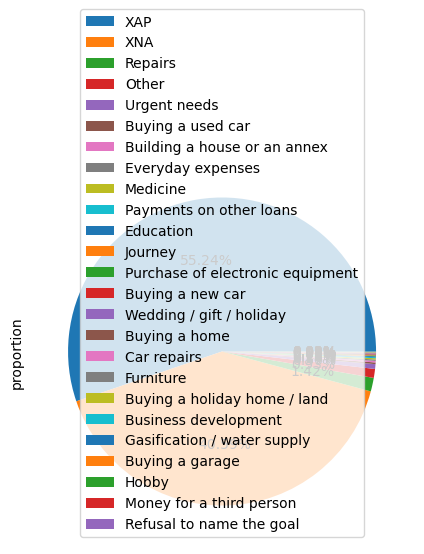

-------------------
NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64


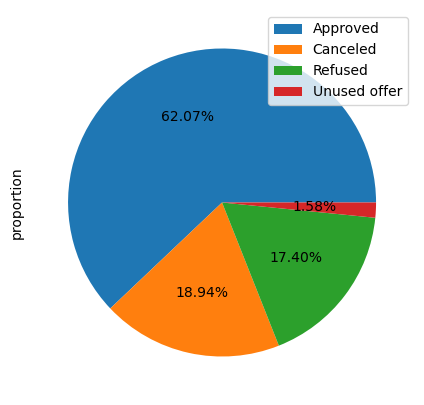

-------------------
NAME_PAYMENT_TYPE
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: proportion, dtype: float64


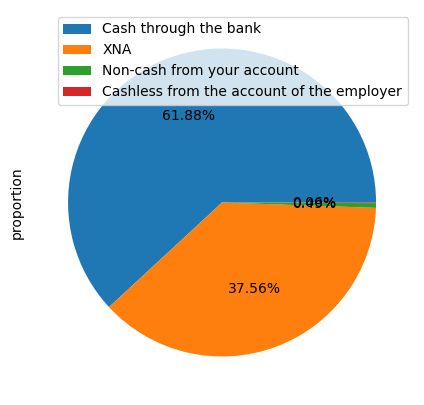

-------------------
CODE_REJECT_REASON
XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: proportion, dtype: float64


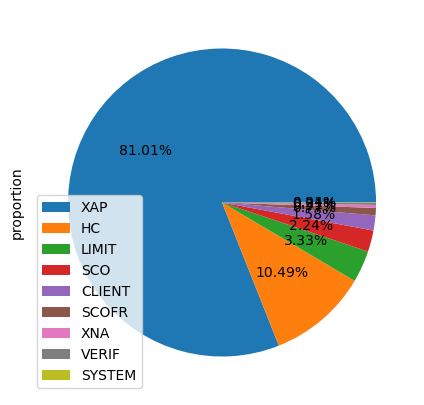

-------------------
NAME_CLIENT_TYPE
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: proportion, dtype: float64


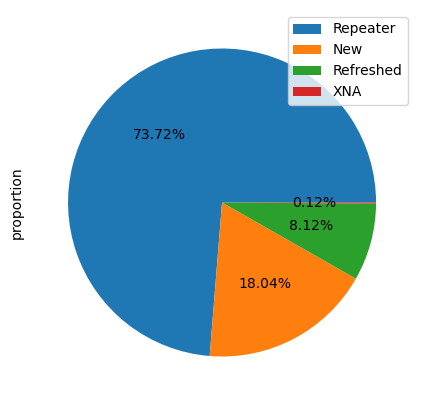

-------------------
NAME_GOODS_CATEGORY
XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance 

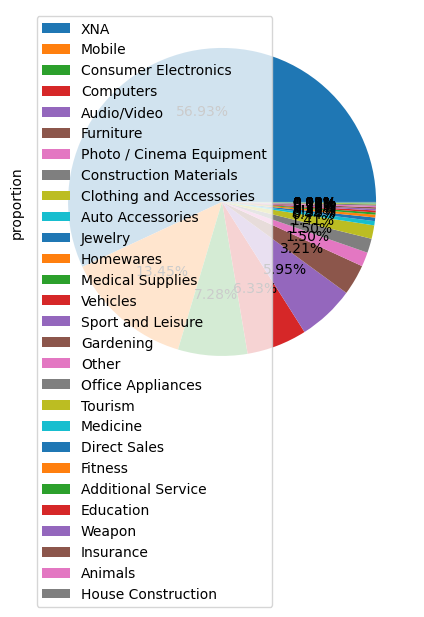

-------------------
NAME_PORTFOLIO
POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: proportion, dtype: float64


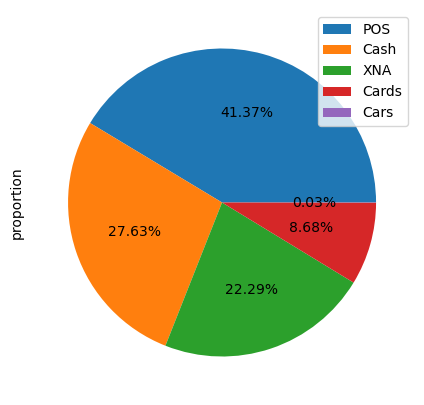

-------------------
NAME_PRODUCT_TYPE
XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: proportion, dtype: float64


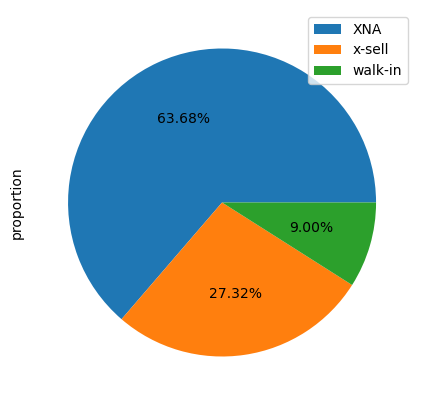

-------------------
CHANNEL_TYPE
Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: proportion, dtype: float64


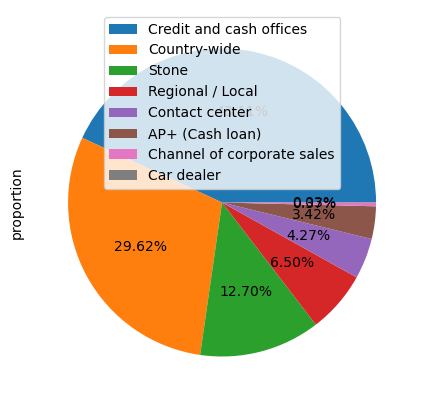

-------------------
NAME_SELLER_INDUSTRY
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: proportion, dtype: float64


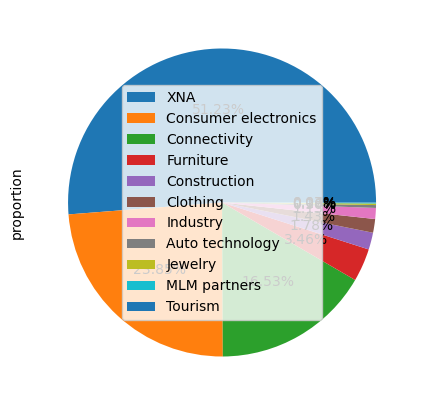

-------------------
NAME_YIELD_GROUP
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: proportion, dtype: float64


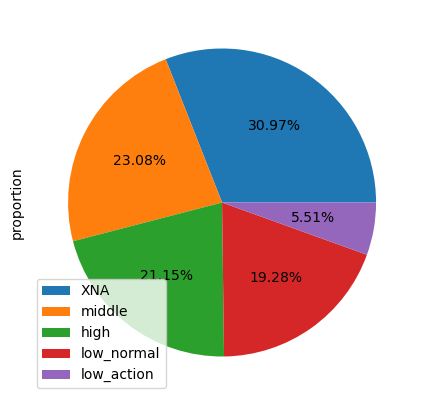

-------------------
PRODUCT_COMBINATION
Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: proportion, dtype: float64


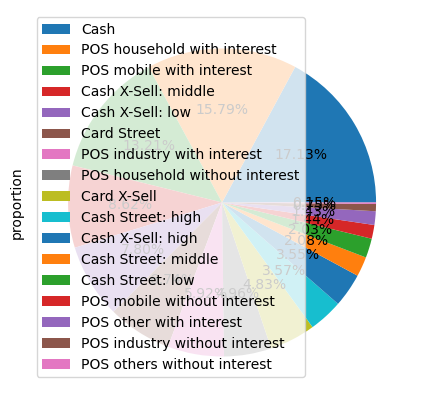

-------------------


In [97]:
#Plot on categorical columns 
for col in cat_cols:
    print(papp_df[col].value_counts(normalize= True)*100)
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize = True).plot.pie(labeldistance = None , autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print('-------------------')

Conclusion >>

1. NAME_CONTRACT_TYPE-45% Applicants received Cash loans, 44% Applicants received Consumer loans, 12% received Revolving during previous application

2. WEEKDAY_APPR_PROCESS_START-All the days have almost equal number of previous loan application 3. NAME_CONTRACT_STATUS-62% of applications are approved, 19% Cancelled, 17% Refused and 2% unused

4. NAME PAYMENT_TYPE-62% of Payment type are Cash through bank, 32% Other modes

5. NAME_CLIENT_TYPE-74% of Applicants are Repeaters, 18% are New applicants, 8% are Refreshed Appplicants

6. NAME_SELLER_INDUSTRY-51% are from other Industries, 24%, 17% are from Consumer electronics, Connectivity Industry respectively

7. CHANNEL_TYPE-43% Channel type is Credit and cash offices, 29% are country wide

8. NAME_YIELD_GROUP-Majority of the yield group are others

9. PRODUCT_COMBINATION - Most used PRODUCT COMBINATION is Cash followed by POS household with interest, POS mobile with interest

In [98]:
#Plot on numerical column 

99th Percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


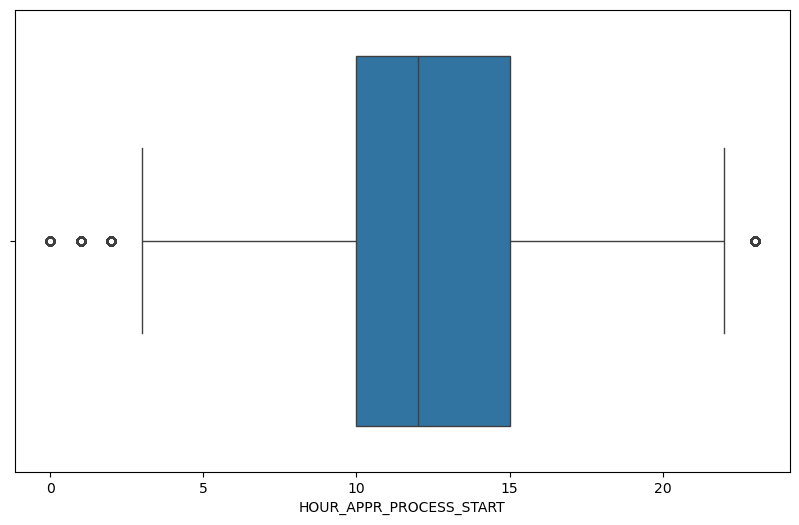

---------
99th Percentile 1.0
count    1.670214e+06
mean     9.964675e-01
std      5.932963e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64


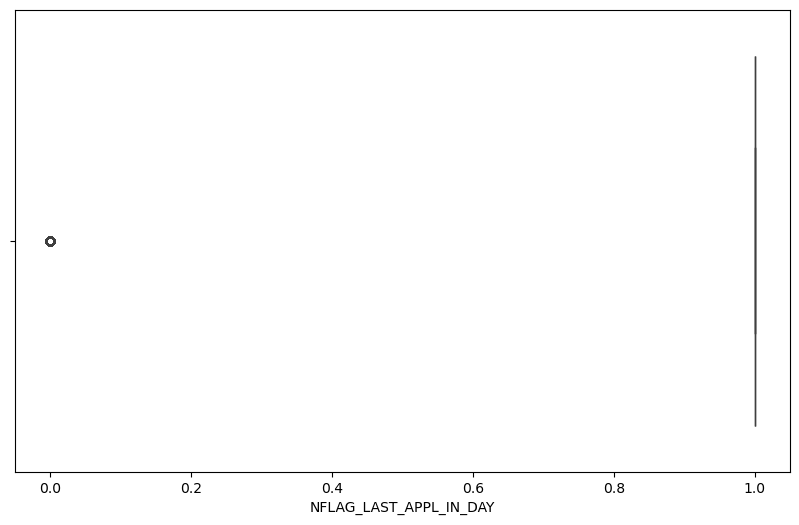

---------
99th Percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


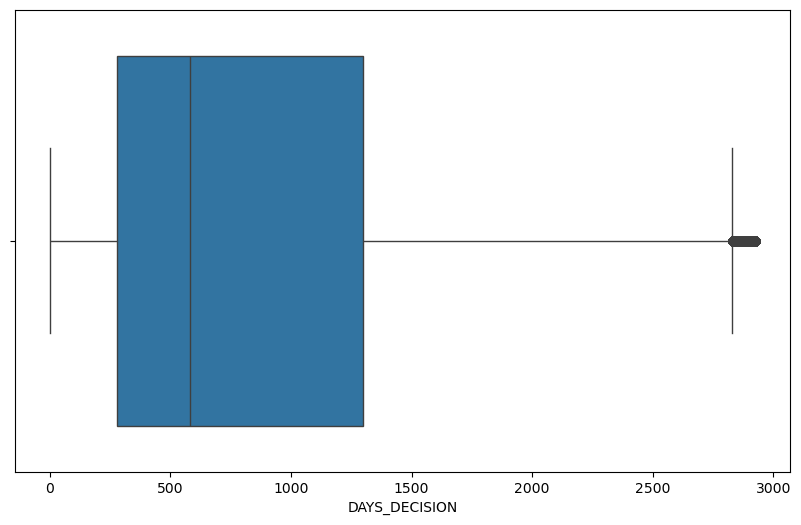

---------
99th Percentile 3570.0
count    1.670214e+06
mean     3.148644e+02
std      7.127403e+03
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


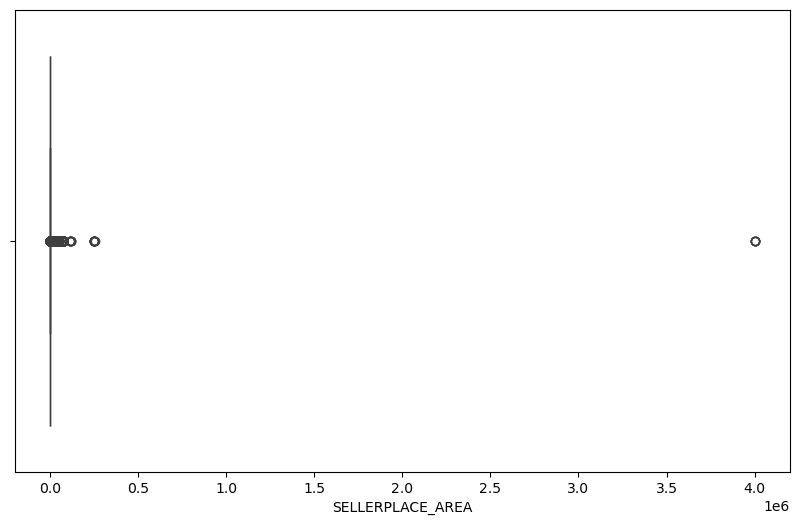

---------
99th Percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


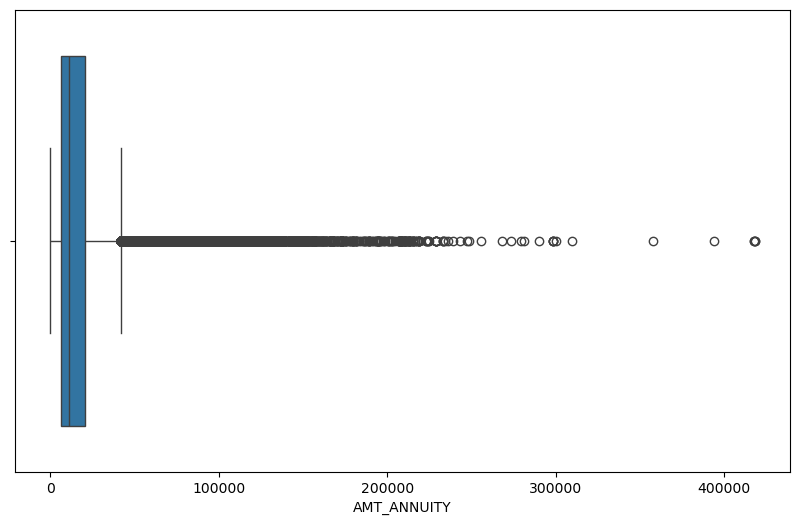

---------
99th Percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


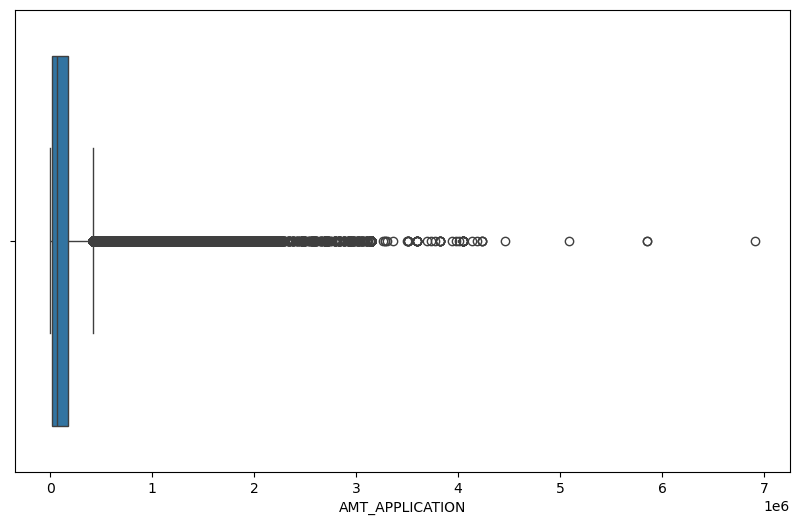

---------
99th Percentile nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


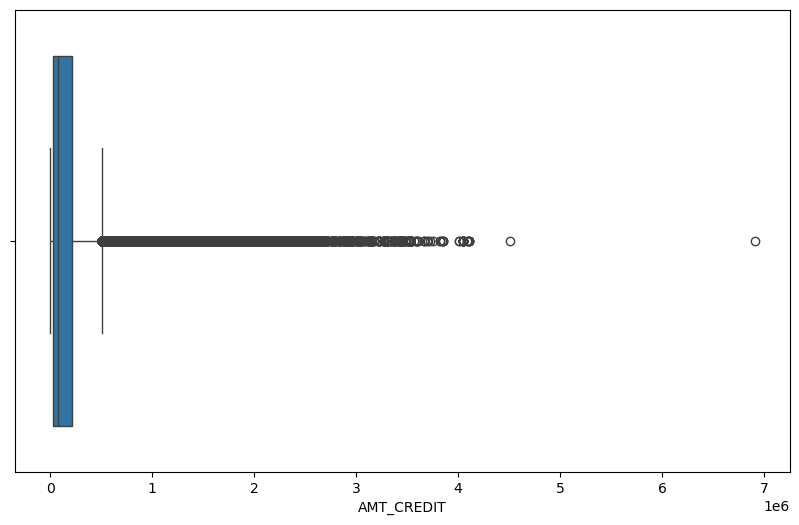

---------
99th Percentile nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


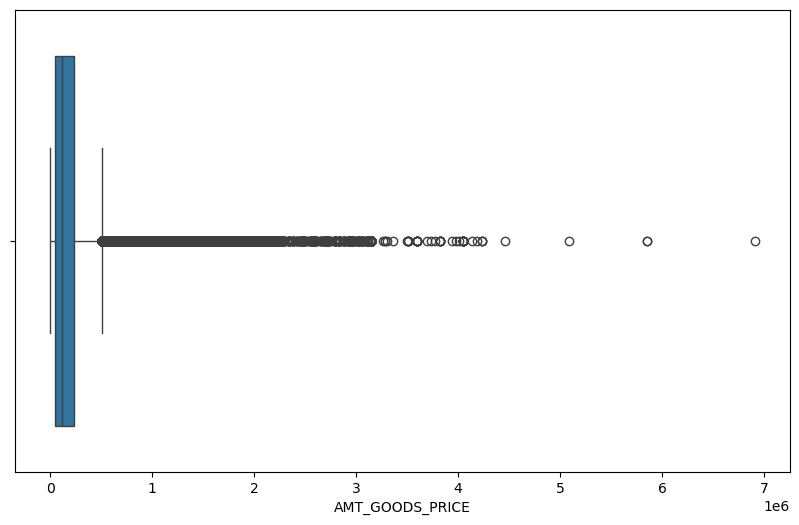

---------
99th Percentile nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


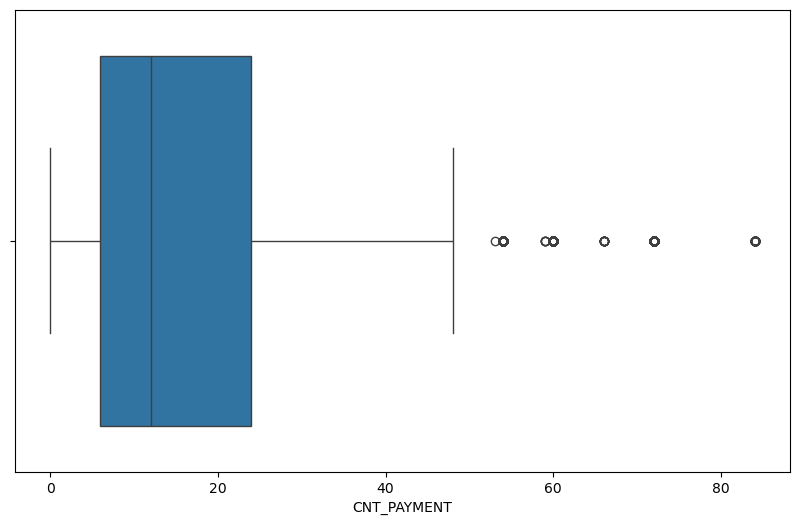

---------
99th Percentile nan
count    997149.000000
mean     342340.056543
std       88413.495220
min           2.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64


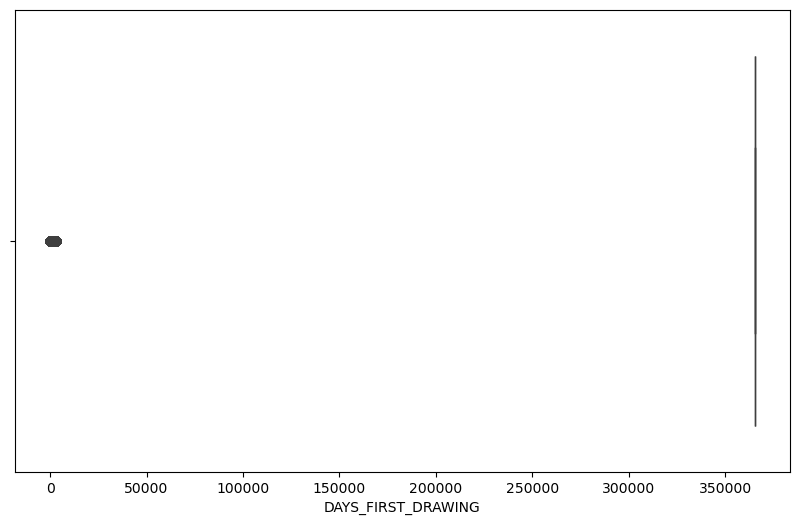

---------
99th Percentile nan
count    997149.000000
mean      15949.224065
std       72007.270877
min           2.000000
25%         475.000000
50%         921.000000
75%        1825.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64


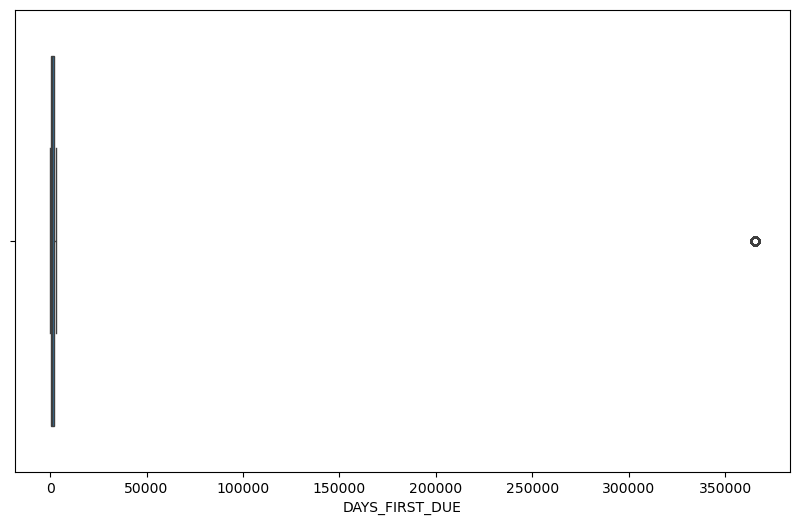

---------
99th Percentile nan
count    997149.000000
mean      35163.363265
std      106405.950190
min           0.000000
25%         257.000000
50%         741.000000
75%        1735.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


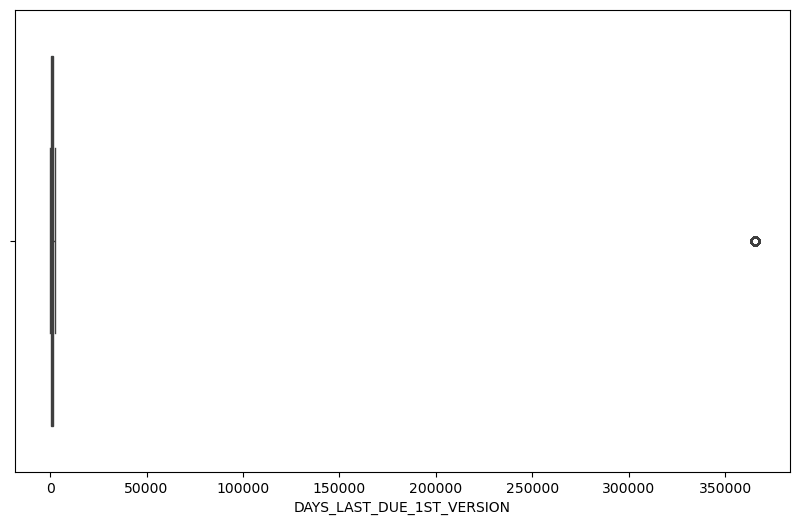

---------
99th Percentile nan
count    997149.000000
mean      78152.730207
std      148833.342466
min           2.000000
25%         455.000000
50%        1155.000000
75%        2418.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64


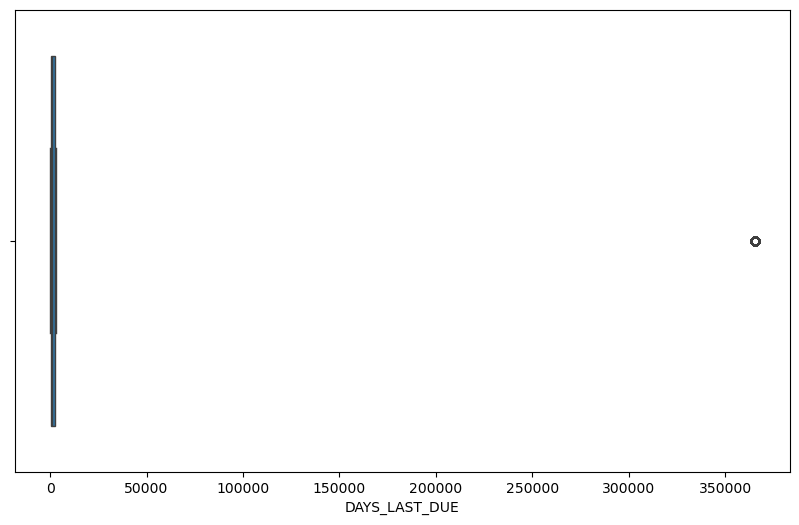

---------
99th Percentile nan
count    997149.000000
mean      83505.775017
std      152484.418802
min           2.000000
25%         447.000000
50%        1171.000000
75%        2501.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64


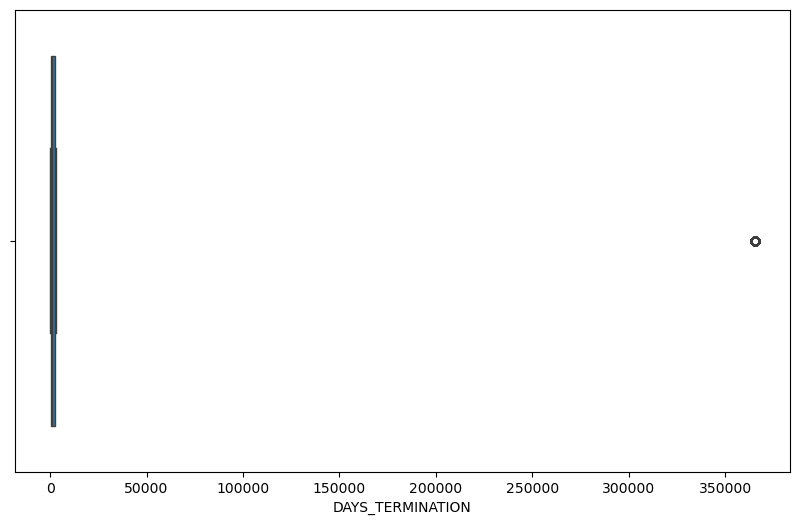

---------
99th Percentile nan
count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64


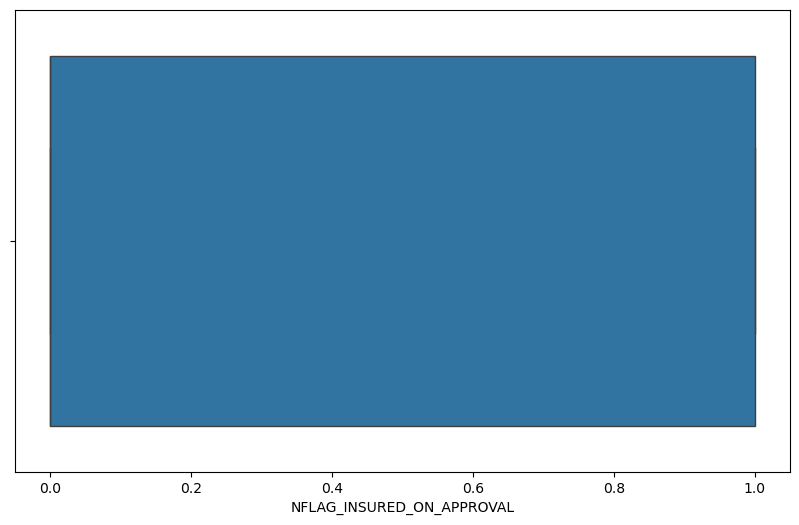

---------


In [99]:
for col in num_cols:
    print("99th Percentile", np.percentile(papp_df[col],99))
    print(papp_df[col].describe()) 
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df,x=col)
    plt.show()
    print("---------")

Conclusion >> Few Columns are with outliers are below

1. HOUR_APPR_PROCESS_START has few outliers and there small difference between mean and median

2. AMT_CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

3. AMT_ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

4. AMT_GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

5. AMT_APPLICATION Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge vanation in mean and median due to outliers

6. CNT_PAYMENT Column has few outliers and there small difference between mean and median

7. DAYS_DECISION has few outliers and there small difference between mean and median

Bivariate and Multivariate Analysis

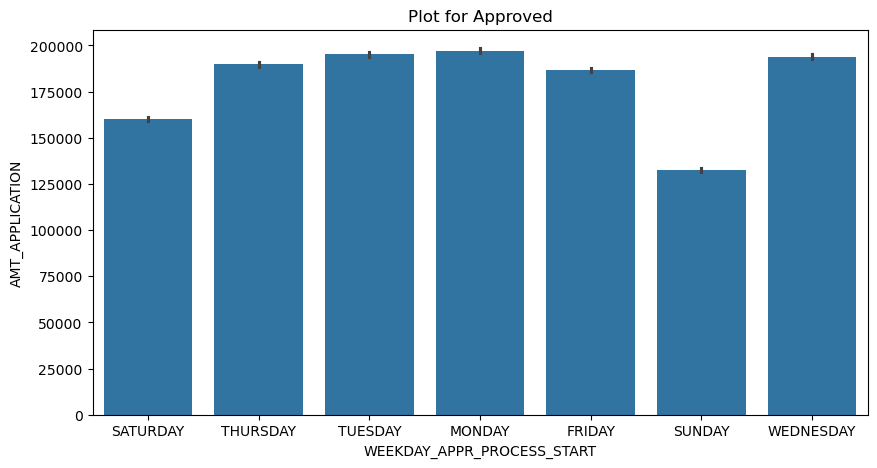

In [100]:
#Bivarient Analysis between WEEKDAY_APPR_PROCESS_START VS AMT APPLICATION
plt.figure(figsize=[10,5]) 
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=approved)
plt.title("Plot for Approved")
plt.show()

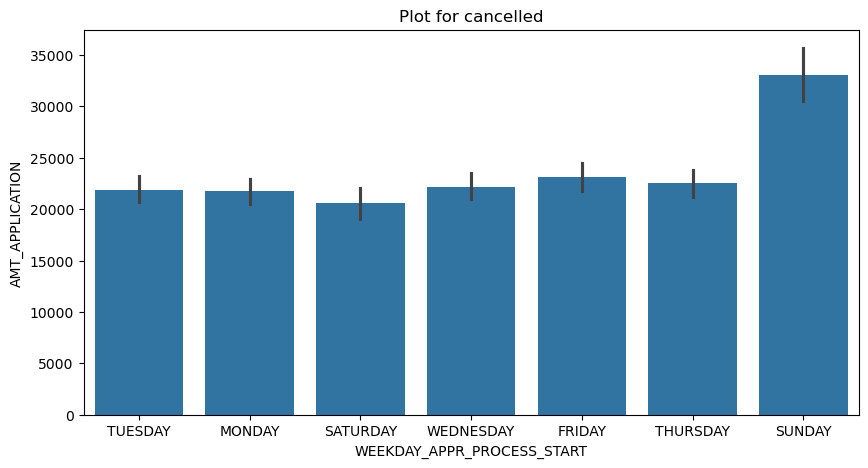

In [101]:
plt.figure(figsize=[10,5]) 
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=cancelled)
plt.title("Plot for cancelled")
plt.show()

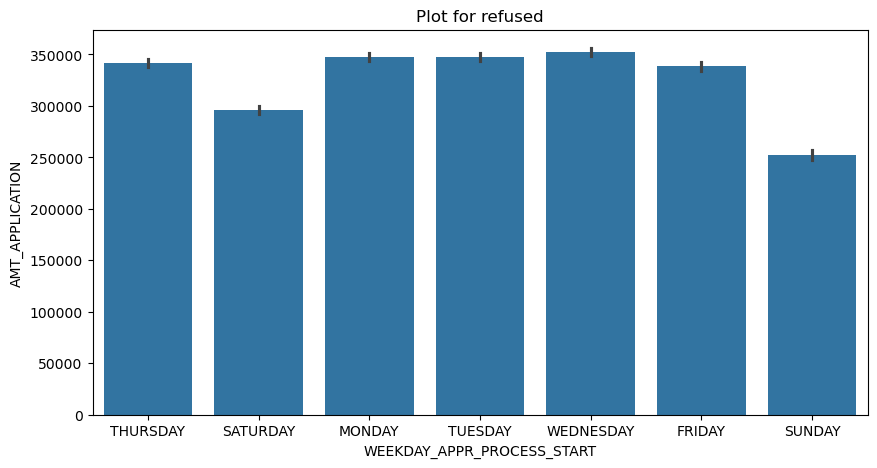

In [102]:
plt.figure(figsize=[10,5]) 
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=refused)
plt.title("Plot for refused")
plt.show()

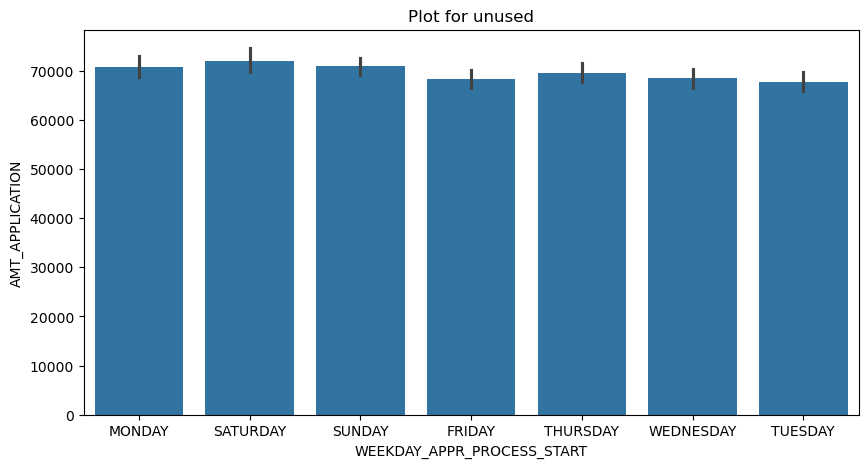

In [103]:
plt.figure(figsize=[10,5]) 
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=unused)
plt.title("Plot for unused")
plt.show()

Conclusion >>

1. The Credit Amount of applicants with approved status is high on Monday and Wednesday than other days, and least on Sunday

2. The Credit Amount of applicants with cancelled status is high on Sunday and almost equal on other days 3. The Credit Amount of applicants with rejected status is least on Sunday and more on Monday and Wednesday

4. The Credit Amount of applicants with unused offer status is almost equal on all days

Bivarient Analysis between AMT_ANNUITY VS AMT_GOODS_PRICE

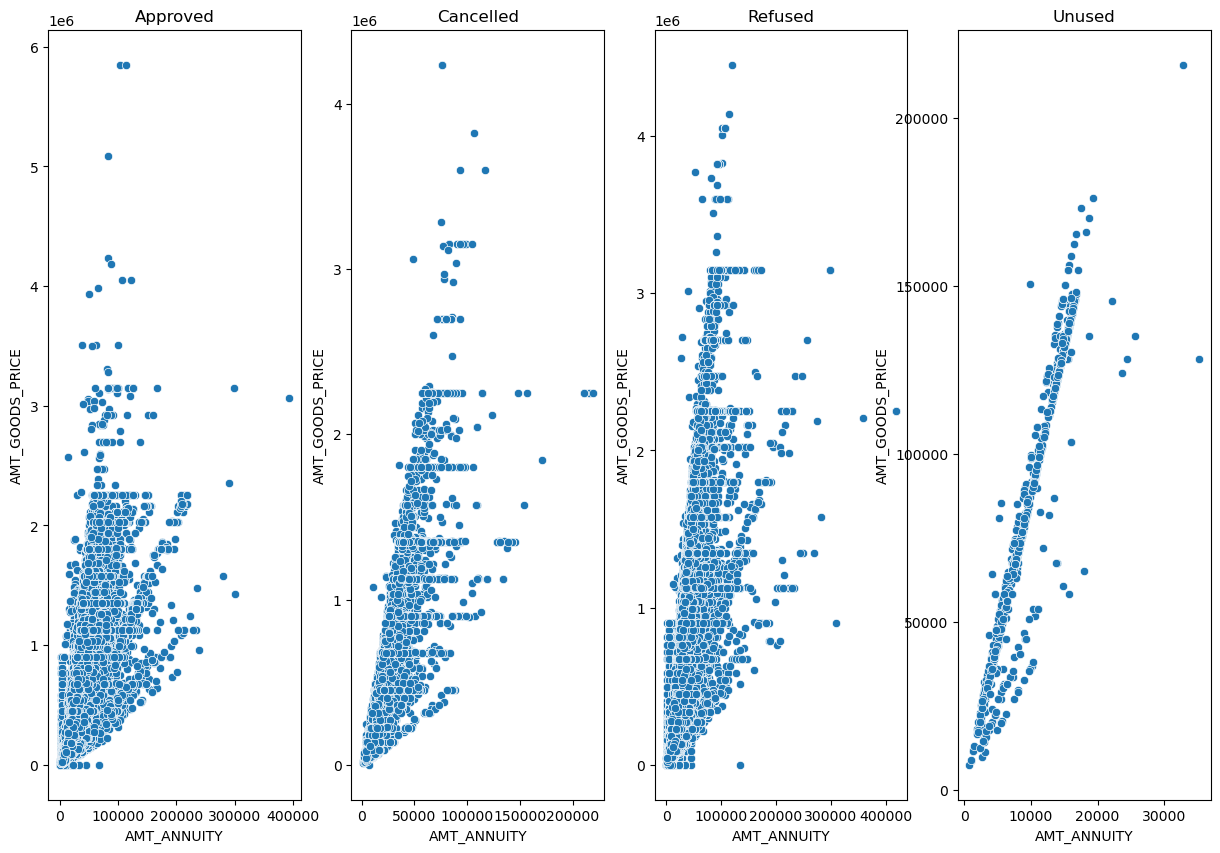

In [104]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x='AMT_ANNUITY', y="AMT_GOODS_PRICE", data=approved)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x='AMT_ANNUITY', y="AMT_GOODS_PRICE", data=cancelled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x='AMT_ANNUITY', y="AMT_GOODS_PRICE",data=refused)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x='AMT_ANNUITY', y="AMT_GOODS_PRICE", data=unused)
plt.show()

Conclusion >>

1. For loan status as Approved, Refused. Cancelled Amount of annuity increases with goods price

2. For loan status as Refused it has no linear relationship

Co-relation between Numerical Columns

In [105]:
corr_approved = approved[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]] 
corr_refused = refused[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]] 
corr_cancelled = cancelled[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]] 
corr_unused = unused[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]

Co-relation for Numerical columns for Approved


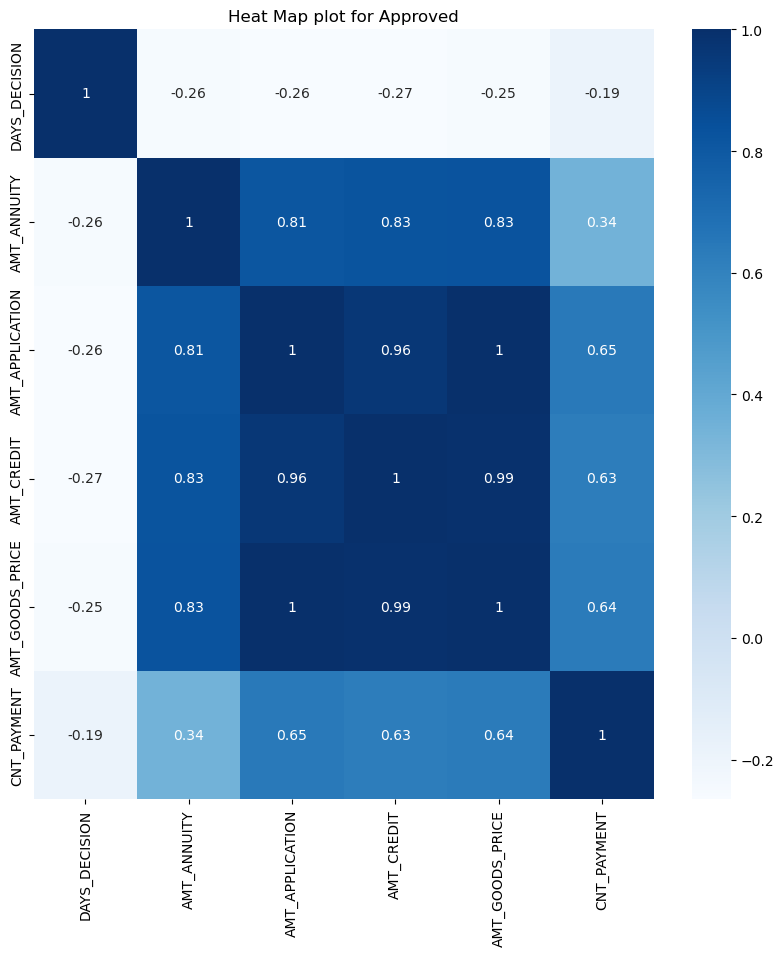

In [106]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_approved.corr(), annot=True, cmap="Blues")
plt.title("Heat Map plot for Approved")
plt.show()

Conclusion >>

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE AMT_ANNUITY

2. DAYS_DECISION has negative Corelation with AMT_GOODS_PRICE AMT_CREDIT, AMT_APPLICATION.CNT_PAYMENT AMT_ANNUITY

Co-relation for Numerical columns for Refused


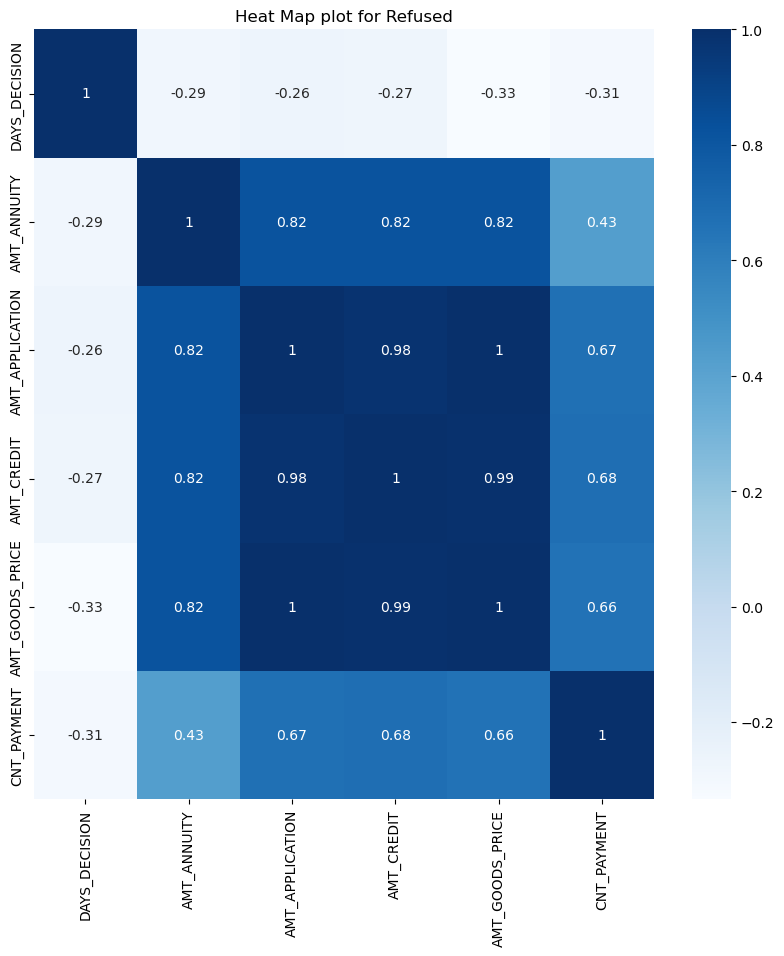

In [107]:
plt.figure(figsize=[10,10]) 
sns.heatmap(corr_refused.corr(), annot=True, cmap="Blues") 
plt.title("Heat Map plot for Refused")
plt.show() 

Conclusion >> For Unused Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE

2. DAYS DECISION and CNT_PAYMENT has negative Corelation with AMT_GOODS_PRICE AMT_CREDIT, AMT_APPLICATION

In [108]:
#Merge the Application and Previous Application DataFrames
merge_df = app_df.merge(papp_df, on=["SK_ID_CURR"], how = 'left')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [109]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 112 entries, SK_ID_CURR to AMT_CREDIT_Category_y
dtypes: category(3), float64(36), int64(46), object(27)
memory usage: 1.2+ GB


In [110]:
#Filtering required columns for our Analysis
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col, axis=1, inplace=True)

In [111]:
merge_df.shape

(1430155, 83)

In [112]:
res1 = pd.pivot_table(data = merge_df, index = ["NAME_INCOME_TYPE", "NAME_CLIENT_TYPE"], columns = ["NAME_CONTRACT_STATUS"], values = "TARGET", aggfunc = "mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='NAME_INCOME_TYPE-NAME_CLIENT_TYPE'>

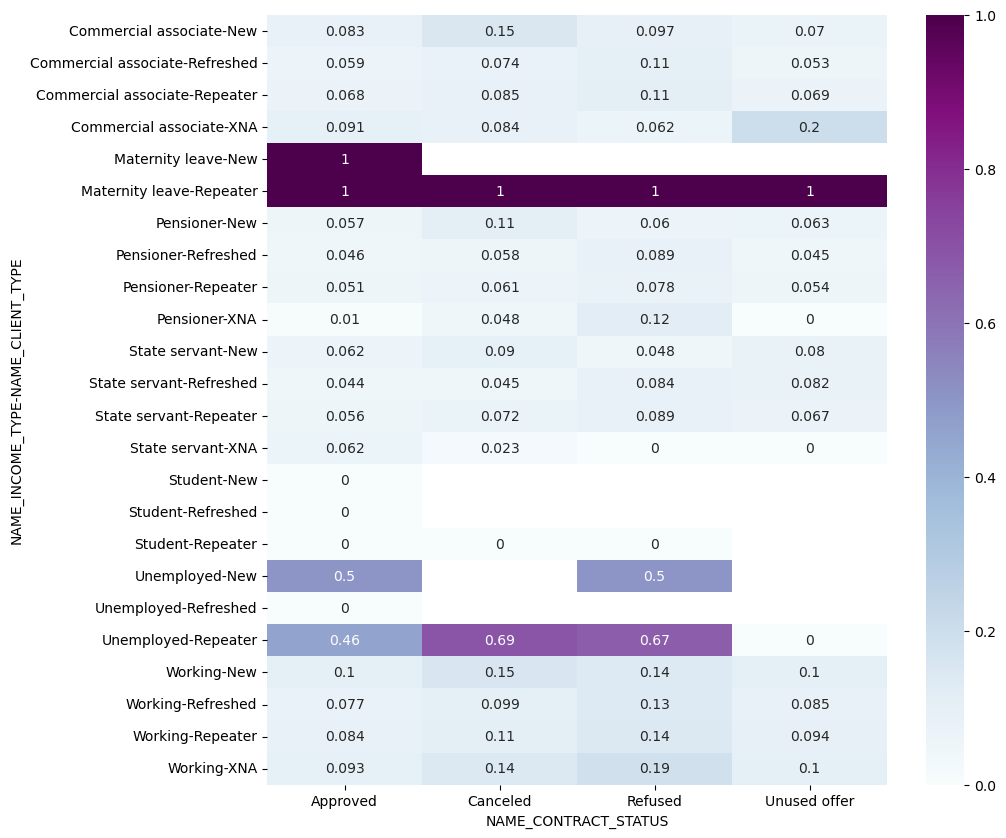

In [113]:
plt.figure(figsize=[10,10]) 
sns.heatmap(res1, annot=True, cmap='BuPu')

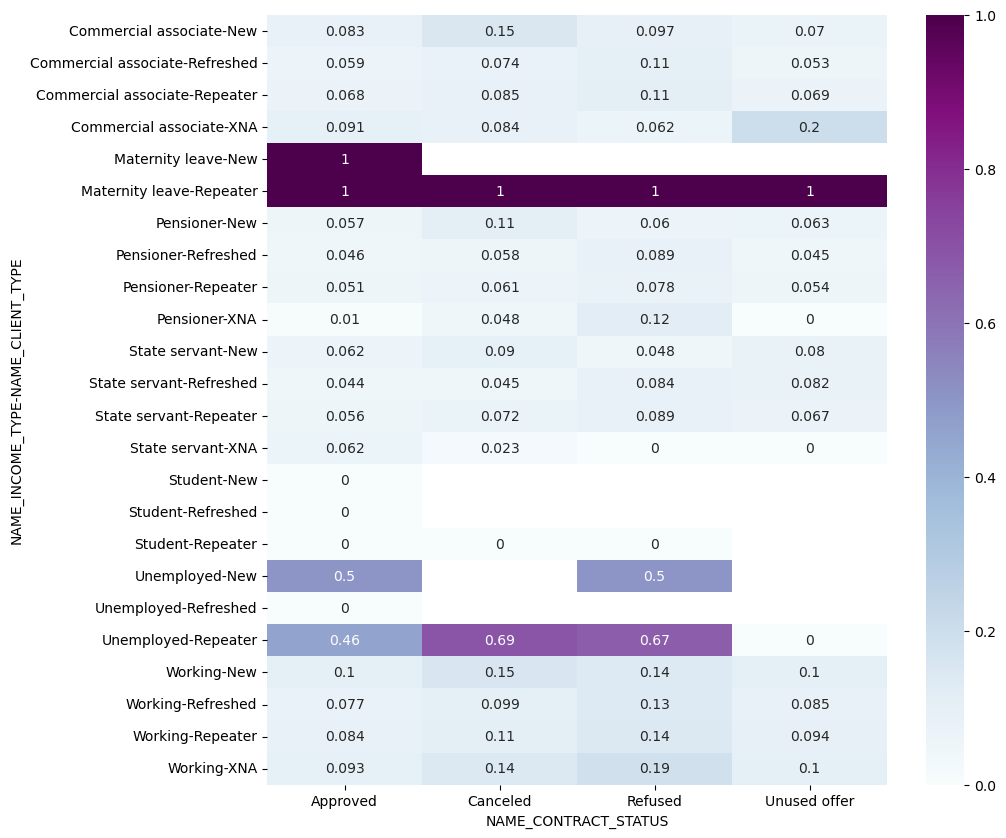

In [114]:
plt.figure(figsize=[10,10]) 
sns.heatmap(res1, annot=True, cmap='BuPu')
plt.show()

• Conclusion >>

1. Applicants with income type Maternity leave and client type New are having more chances of getting the loan approved

2. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan cancelled

3. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan Refused

4. Applicants with income type Maternity leave and client type Repeater, Working and client type New are not able to utilizte the bank's offer

In [115]:
res2 = pd.pivot_table(data = merge_df, index = ["CODE_GENDER", "NAME_SELLER_INDUSTRY"],
                      columns=["TARGET"], values =  "AMT_GOODS_PRICE_x", aggfunc = 'sum')


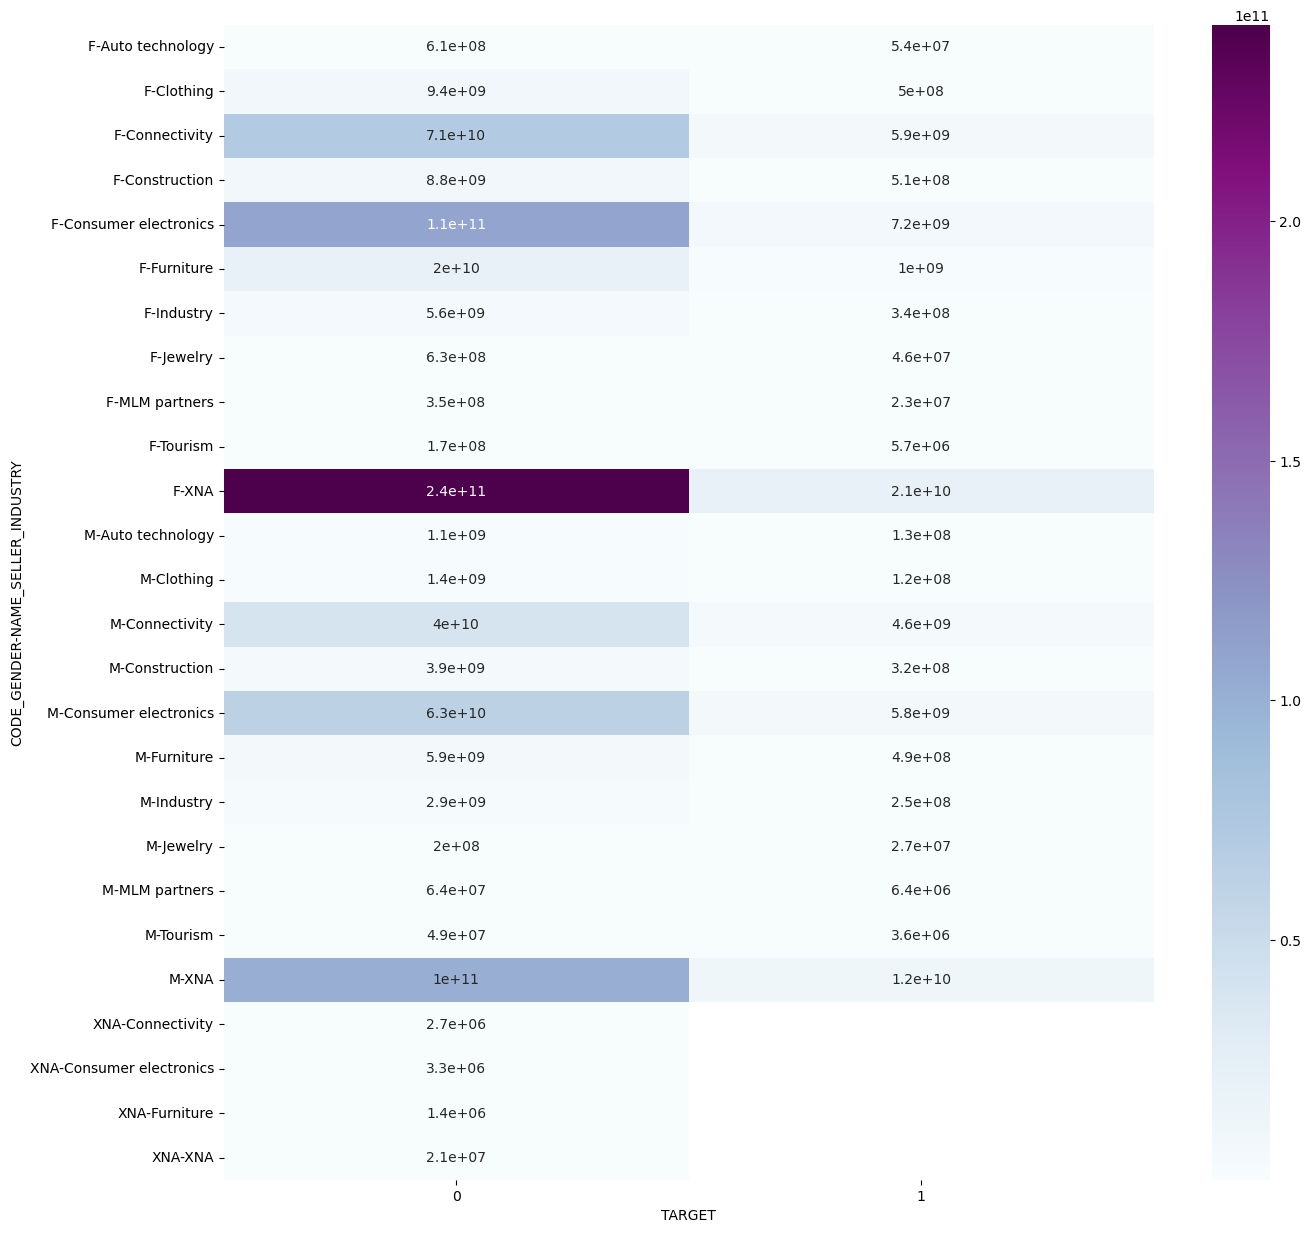

In [116]:
plt.figure(figsize=[15,15]) 
sns.heatmap(res2, annot=True, cmap='BuPu')
plt.show()